In [1]:
from limpieza import main 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

file_path = "/home/cord2108/ITAM/Aplicada/Proyecto_final/atp_data/atp_matches_till_2022.csv"
final_data = main(file_path, show_plots=False)

display(final_data)

Loading and cleaning data...
Creating engineered features...
Data cleaning completed. Dataset shape: (31169, 53)
Processing five-set matches...
Number of five-set matches: 14347
Calculating 5-match rolling averages for player statistics...
Five-set match processing completed. Dataset shape: (10982, 47)
Analyzing Grand Slam matches...
Number of Grand Slam matches: 10896
1991-01-14 00:00:00
2022-08-29 00:00:00
✅ surface found — dtype: object, unique values: 3

🔄 Applying one-hot encoding...
✅ One-hot encoding successful.

📐 Shape after encoding: (10896, 35)
🧼 Column types: float64    34
int64       1
Name: count, dtype: int64

✅ All columns are numeric and ready for modeling.
✅ Rows after dropping NaNs: 10848
✅ Rows after removing outliers: 10746


/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



📊 VIF Scores (Numerical Features Only):
               feature          VIF
2           winner_age          inf
4            loser_age          inf
5          winner_rank          inf
7           loser_rank          inf
9            rank_diff          inf
10            avg_rank          inf
11            min_rank          inf
13             avg_age          inf
0                const  2684.498516
17          w_avg_svpt    83.972742
26          l_avg_svpt    78.082695
28        l_avg_1stWon    61.207012
23       w_avg_bpFaced    58.173092
19        w_avg_1stWon    55.970403
32       l_avg_bpFaced    53.711661
18         w_avg_1stIn    31.334155
27         l_avg_1stIn    29.594401
22       w_avg_bpSaved    26.181269
31       l_avg_bpSaved    25.499235
29        l_avg_2ndWon    20.442511
20        w_avg_2ndWon    20.165281
30         l_avg_SvGms    14.817457
21         w_avg_SvGms    13.595108
24           l_avg_ace     3.299746
15           w_avg_ace     3.270575
16            w_avg_df 

winner_ht  loser_ht  winner_rank_points  loser_rank_points  age_diff  \
120        188.0     170.0              3889.0              420.0       1.7   
121        188.0     180.0              2541.0              553.0       4.2   
122        183.0     178.0               303.0              345.0       3.9   
123        190.0     190.0              3528.0             1229.0       2.9   
124        188.0     188.0              2541.0             3889.0       5.9   
...          ...       ...                 ...                ...       ...   
14341      183.0     196.0              4695.0             2360.0       2.7   
14343      188.0     188.0              1400.0             3120.0       0.2   
14344      183.0     198.0              4695.0             1315.0       2.6   
14345      185.0     188.0              5100.0             1400.0       5.3   
14346      185.0     183.0              5100.0             4695.0       4.3   

       close_ranking  w_avg_ace  w_avg_df  l_avg_ace  l_avg_df  surface_Grass  \
120                0       4.00      4.50       2.00      1.50            0.0   
121                0       5.25      3.00       3.75      2.00            0.0   
122                1       5.50      3.25       5.25      5.50            0.0   
123                1       5.75      1.25       7.50      1.25            0.0   
124                1       6.00      2.80       3.60      4.40            0.0   
...              ...        ...       ...        ...       ...            ...   
14341              1       6.40      5.60      15.40      2.00            0.0   
14343              1      14.80      4.60      12.40      3.60            0.0   
14344              1       5.20      4.20      17.60      3.80            0.0   
14345              1       4.20      4.20      15.20      3.60            0.0   
14346              1       5.20      3.60       5.20      3.00            0.0   

       surface_Hard  minutes  
120             1.0     88.0  
121             1.0    147.0  
122             1.0    204.0  
123             1.0    111.0  
124             1.0    242.0  
...             ...      ...  
14341           1.0    156.0  
14343           1.0    156.0  
14344           1.0    180.0  
14345           1.0    259.0  
14346           1.0    200.0  

[10746 rows x 13 columns]

In [2]:
best_of_five = final_data.copy()

In [3]:
from scipy import stats

# Normality tests for best_of_five
print("\nBest of 5:")
shapiro_5 = stats.shapiro(best_of_five["minutes"])
dagostino_5 = stats.normaltest(best_of_five["minutes"])
print(f"Shapiro-Wilk Test: statistic={shapiro_5.statistic:.4f}, p-value={shapiro_5.pvalue:.4f}")
print(f"D'Agostino-Pearson Test: statistic={dagostino_5.statistic:.4f}, p-value={dagostino_5.pvalue:.4f}")



Best of 5:
Shapiro-Wilk Test: statistic=0.9818, p-value=0.0000
D'Agostino-Pearson Test: statistic=277.9218, p-value=0.0000


/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10746.
  res = hypotest_fun_out(*samples, **kwds)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols_5 = best_of_five.select_dtypes(include='number')

corr_matrix_5 = numeric_cols_5.corr()

correlations_with_minutes_5 = corr_matrix_5["minutes"].sort_values(key=abs, ascending=False)

print("\nTop correlations with 'minutes' (Best of 5):")
print(correlations_with_minutes_5)



Top correlations with 'minutes' (Best of 5):
minutes               1.000000
loser_rank_points     0.174237
close_ranking         0.099891
surface_Grass        -0.072030
l_avg_ace             0.062968
winner_rank_points   -0.058852
loser_ht              0.048247
surface_Hard          0.031945
l_avg_df             -0.030858
w_avg_ace            -0.020750
w_avg_df              0.011282
winner_ht            -0.005342
age_diff              0.002467
Name: minutes, dtype: float64


# Aqui solo nos vamos a enfocar en los grand slams

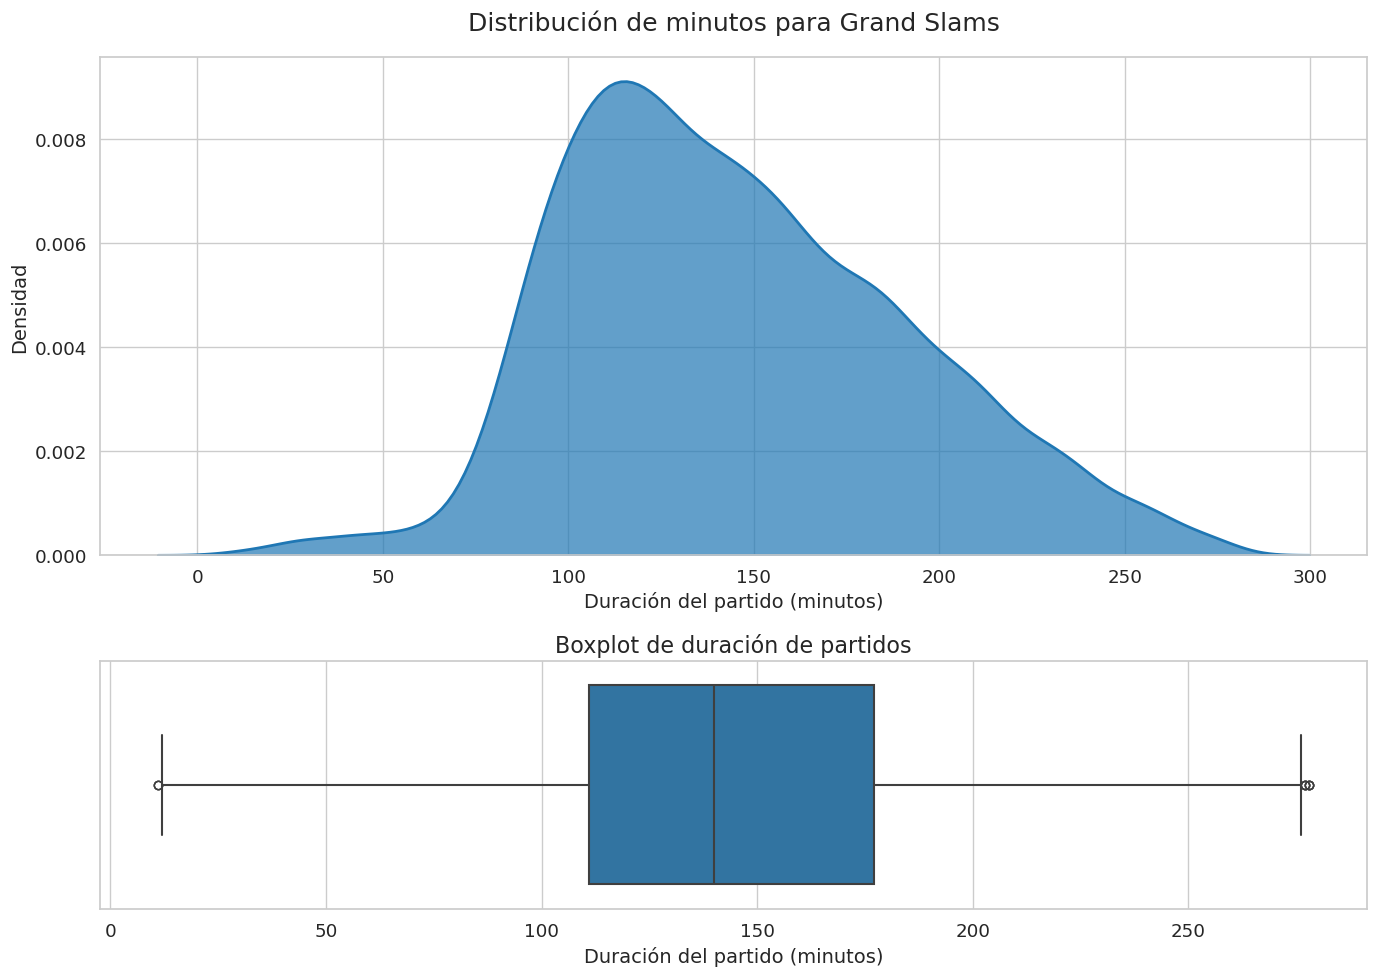

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

# === KDE and Box Plot side-by-side ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1]})

# === KDE Plot ===
sns.kdeplot(
    data=best_of_five, 
    x="minutes", 
    fill=True, 
    color="#1f77b4", 
    linewidth=2, 
    alpha=0.7, 
    ax=axes[0]
)
axes[0].set_title("Distribución de minutos para Grand Slams", fontsize=18, pad=20)
axes[0].set_xlabel("Duración del partido (minutos)", fontsize=14)
axes[0].set_ylabel("Densidad", fontsize=14)

# === Box Plot ===
sns.boxplot(
    data=best_of_five, 
    x="minutes", 
    color="#1f77b4", 
    linewidth=1.5, 
    ax=axes[1]
)
axes[1].set_xlabel("Duración del partido (minutos)", fontsize=14)
axes[1].set_title("Boxplot de duración de partidos", fontsize=16)

plt.tight_layout()
plt.show()


# Modelo regresion lineal

## Fundamento teórico del modelo y los diagnósticos

### 1. Modelo lineal con interacciones

Partimos del **modelo lineal general**  
$$
\mathbf y = \mathbf X\,\boldsymbol\beta + \boldsymbol\varepsilon,
$$
donde  
- $\mathbf y\in\mathbb R^n$ es el vector de observaciones de la duración de los partidos.  
- $\mathbf X\in\mathbb R^{n\times p}$ es la **matriz de diseño**, que incluye  
  1. Una columna de unos para el intercepto,  
  2. Dummies de superficie (`Grass`, `Hard` versus la referencia `Clay`),  
  3. Variables numéricas base ($\mathbf X_{\text{base}}$),  
  4. Términos de interacción ($\mathbf X_{\text{base}}\times\text{dummies}$).  
- $\boldsymbol\beta\in\mathbb R^p$ contiene  
  - $\beta_0$: intercepto base (superficie de referencia),  
  - $\beta_d$: desplazamientos de intercepto por superficie,  
  - $\gamma_k$: pendientes base de las variables numéricas,  
  - $\delta_{k,d}$: ajustes de pendiente (interacción) para cada superficie.  
- $\boldsymbol\varepsilon$ son los residuos, asumiendo $\mathbb{E}[\varepsilon_i]=0$, $\operatorname{Var}(\varepsilon_i)=\sigma^2$ e independencia.

La estimación por **mínimos cuadrados ordinarios (OLS)** minimiza  
$$
\min_{\boldsymbol b}\,\|\mathbf y - \mathbf X\boldsymbol b\|^2
\quad\longrightarrow\quad
\widehat{\boldsymbol\beta} = (\mathbf X^\top\mathbf X)^{-1}\mathbf X^\top\mathbf y.
$$

### 2. Prevención de colinealidad: VIF

Para garantizar que $\mathbf X^\top\mathbf X$ sea numéricamente estable, calculamos el **Factor de Inflación de Varianza (VIF)** para cada predictor $j$:
$$
\mathrm{VIF}_j = \frac{1}{1 - R_j^2},
$$
donde $R_j^2$ es la $R^2$ al regredir la columna $j$ contra el resto de columnas de $\mathbf X$. Valores de VIF > 10 indican colinealidad excesiva y se descartan variables para evitar estimaciones inestables.

### 3. Diagnósticos de ajuste

Una vez ajustado el modelo, usamos los residuos y valores ajustados para comprobar los supuestos:

1. **Residuos vs Ajustados:**  
   Busca patrones sistemáticos. Un embudo o forma curva sugiere **heterocedasticidad**.

2. **Gráfico Q–Q de residuos:**  
   Compara cuantiles empíricos de residuos con cuantiles teóricos normales. Desviaciones en las colas indican **no normalidad**.

3. **Escala–Local** ($\sqrt{|e_i^*|}$ vs predichos):  
   Estima homocedasticidad en escala de residuos estandarizados; la línea LOWESS debe ser aproximadamente horizontal.

4. **Leverage vs Residuos estandarizados:**  
   - **Leverage** ($h_{ii}$) mide la influencia de la $i$-ésima fila en el ajuste  
   - Residuos estandarizados altos ± leverage alto pueden indicar puntos influyentes.

5. **Distancia de Cook:**  
   $$
   D_i = \frac{e_i^2}{p\,\hat\sigma^2}\,\frac{h_{ii}}{(1-h_{ii})^2},
   $$
   cuantifica el cambio en $\widehat{\boldsymbol\beta}$ al eliminar la observación $i$. Valores $D_i>4/n$ señalan observaciones influyentes.

6. **Histograma de residuos con curva normal:**  
   Muestra la distribución de residuos y comprueba asimetría o colas pesadas.

### 4. Interpretación y robustez

- La inclusión de **interacciones** permite que **cada superficie tenga su propia pendiente** para cada variable predictora, capturando efectos contextuales distintos (por ejemplo, cómo `age_diff` impacta diferente en césped versus arcilla).  
- Los diagnósticos confirman o refutan los supuestos de OLS; en presencia de violaciones severas (heterocedasticidad, no normalidad, outliers muy influyentes), podríamos:  
  - Aplicar transformaciones (log–link, Box–Cox).  
  - Usar **regresión ponderada** o modelos de **robustez** (e.g., Huber).  
  - Implementar alternativas **machine learning** más flexibles.

Con esta fundamentación, el bloque de código implementa un análisis exhaustivo que va más allá de la mera estimación de coeficientes, asegurando la validez estadística y la interpretabilidad del modelo.

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     48.58
Date:                Wed, 21 May 2025   Prob (F-statistic):          7.24e-114
Time:                        12:18:51   Log-Likelihood:                -56170.
No. Observations:               10746   AIC:                         1.124e+05
Df Residuals:                   10733   BIC:                         1.125e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                114.0512     20

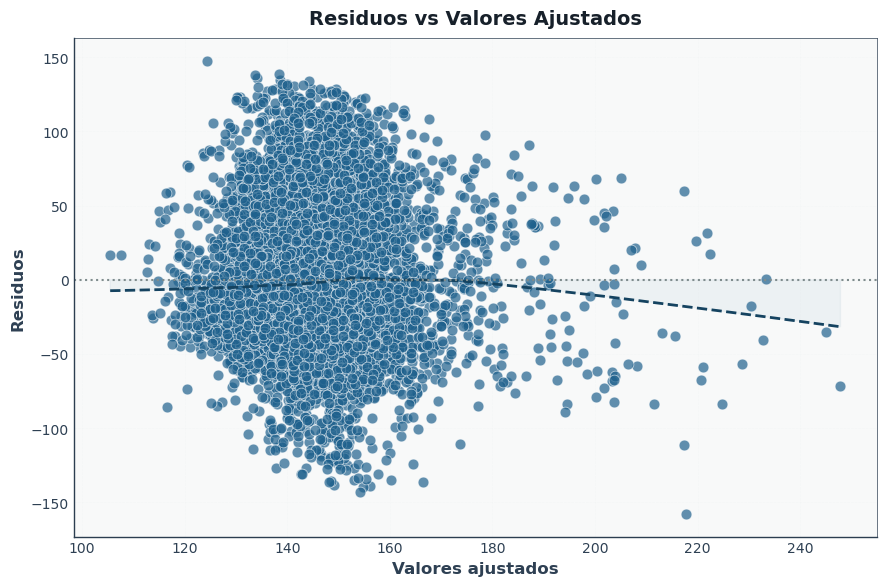

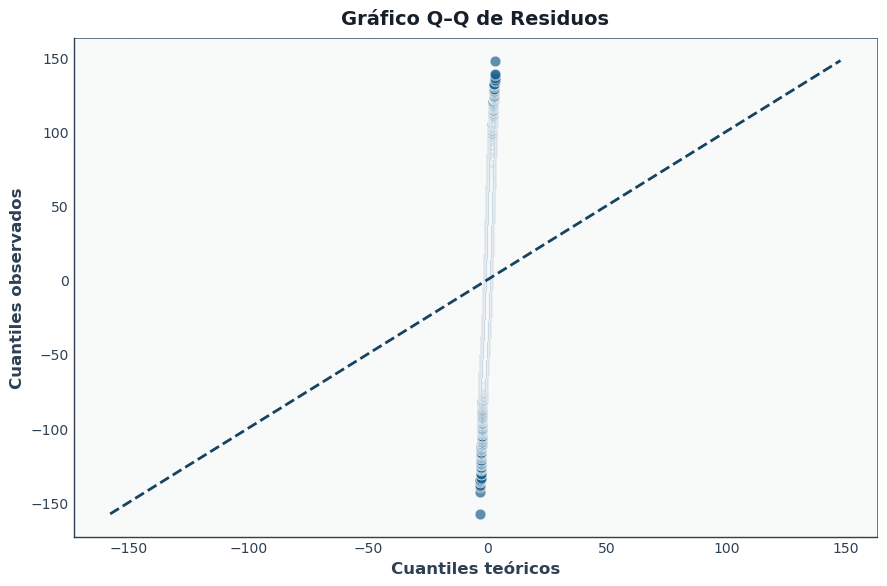

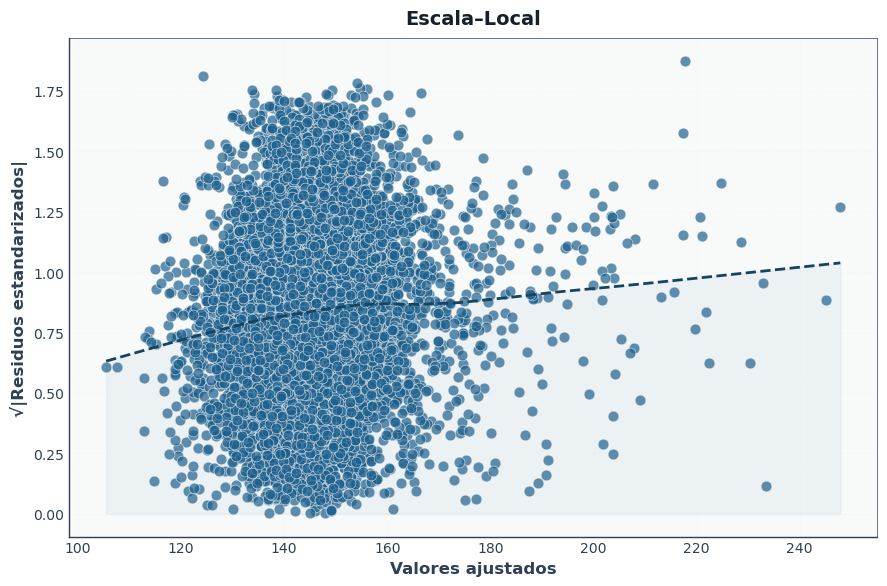

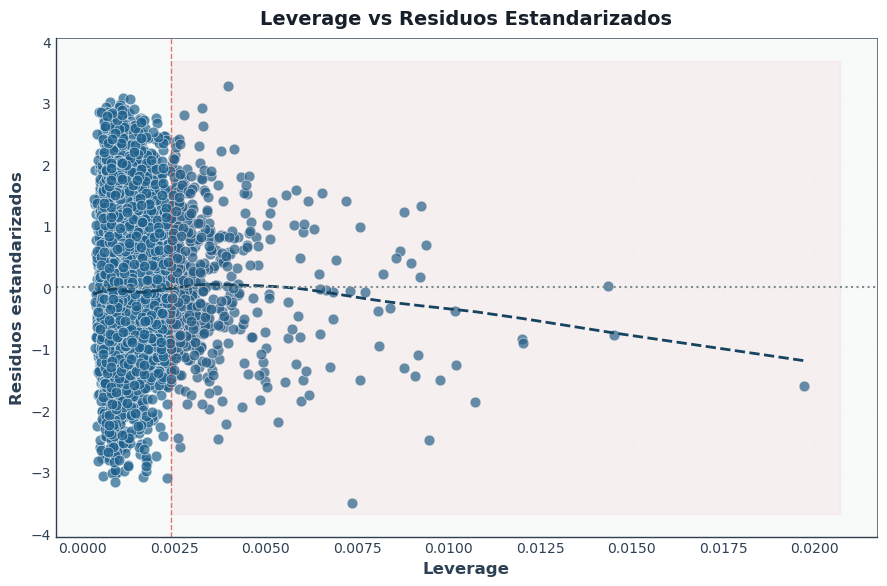

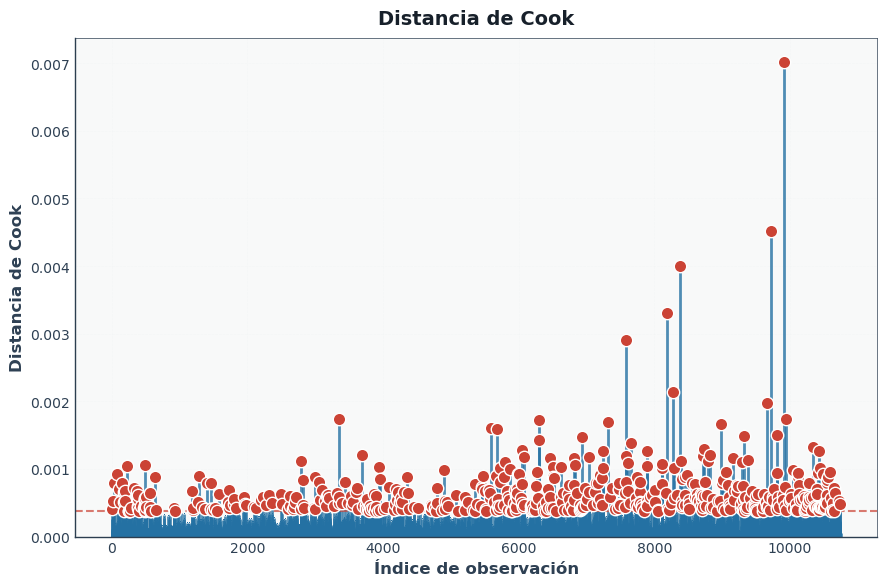

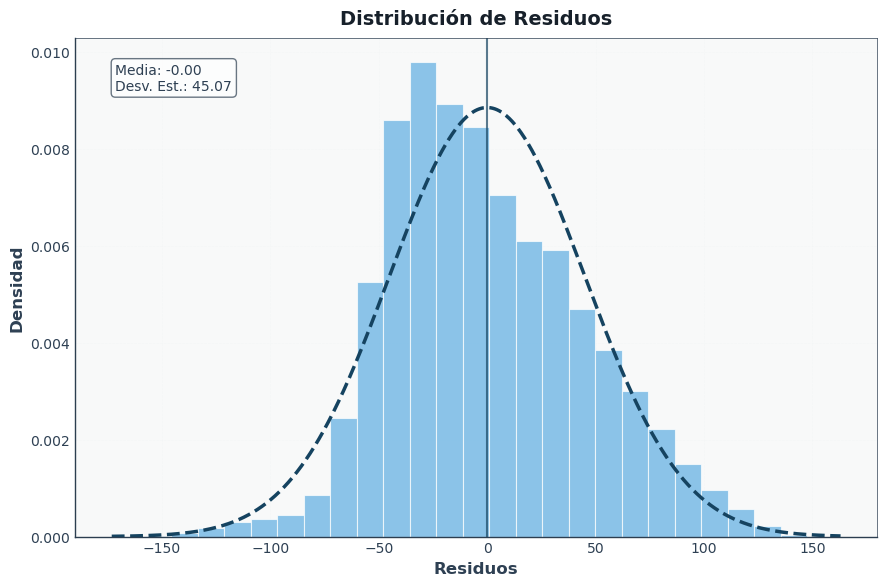

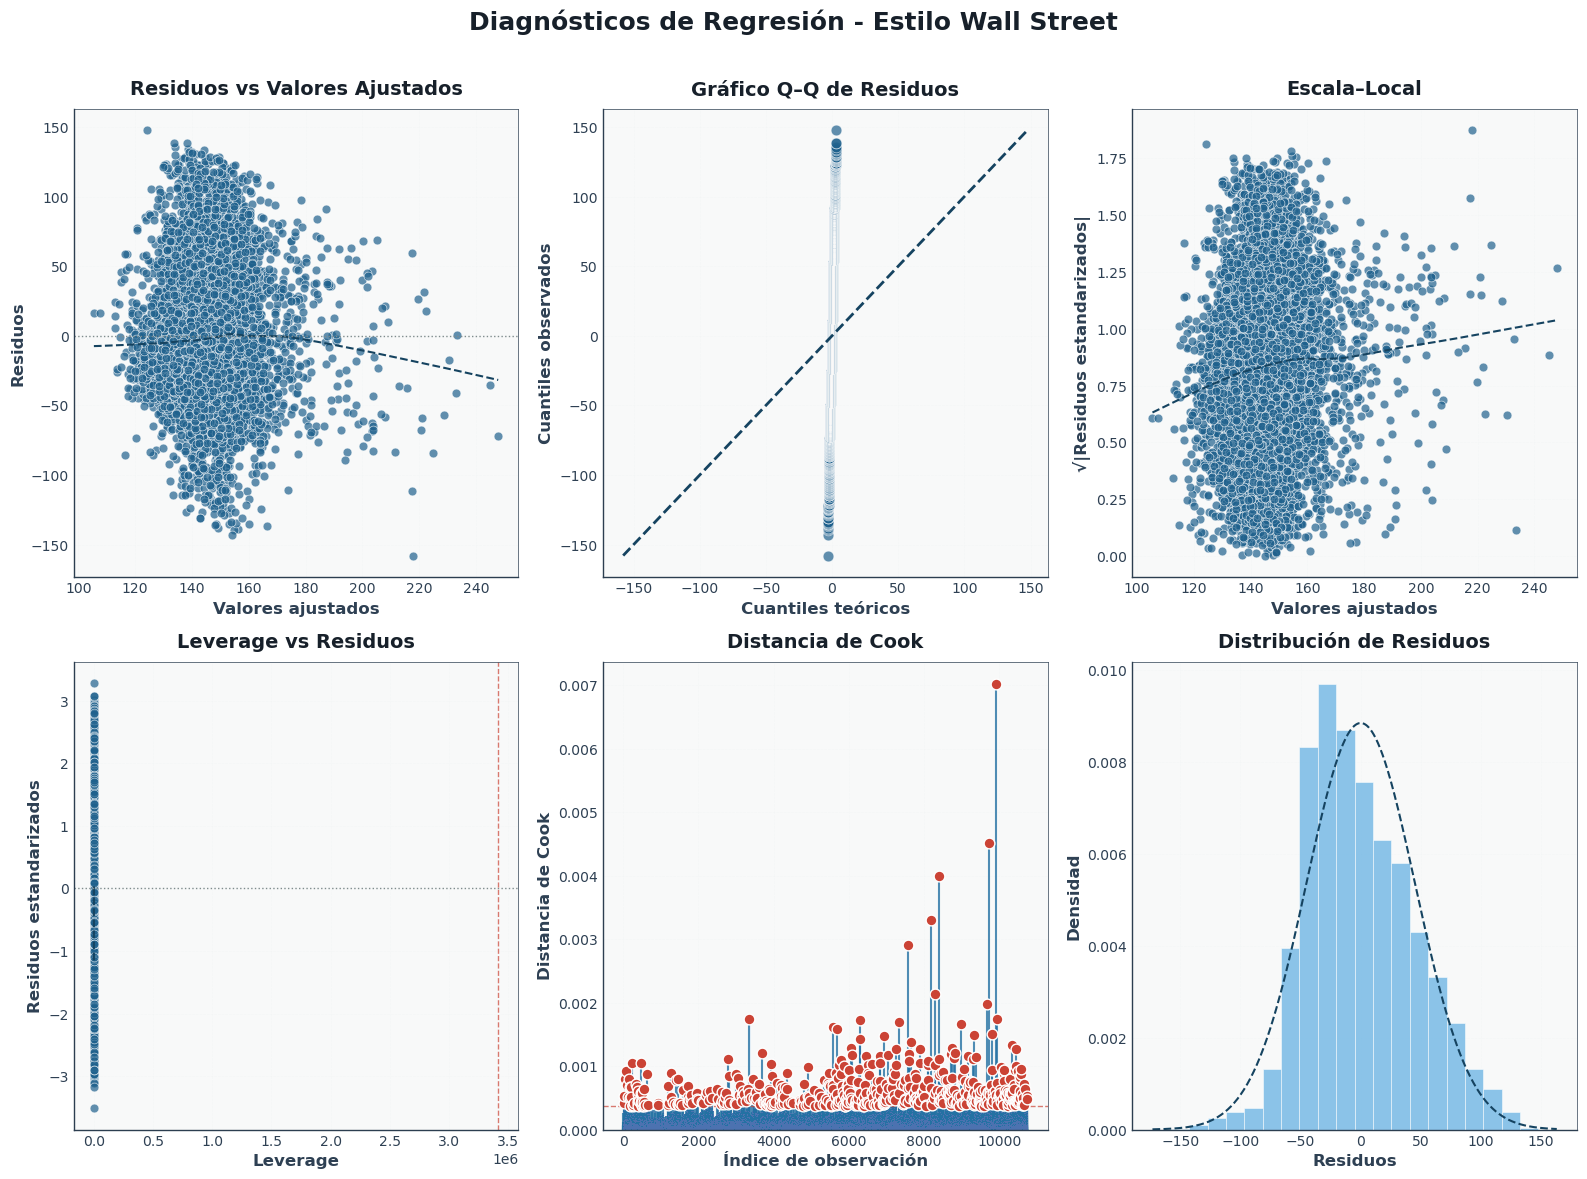

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from scipy import stats
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

# === Configuración de estilo "Wall Street" mejorado ===
plt.style.use('seaborn-v0_8-whitegrid')  # Base estilo seaborn como punto de partida

# Configuración de fuentes más profesionales - usando fuentes genéricas disponibles en todos los sistemas
plt.rcParams.update({
    'font.family': 'sans-serif',  # Cambiado de 'serif' a 'sans-serif' que está más disponible
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.dpi': 100,
    'figure.figsize': (8, 5),
    'axes.facecolor': 'white',
    'axes.edgecolor': '#2E4053',
    'axes.labelcolor': '#2E4053',
    'axes.grid': True,
    'grid.color': '#ECF0F1',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'xtick.color': '#2E4053',
    'ytick.color': '#2E4053',
    'text.color': '#2E4053',
    'figure.facecolor': 'white',
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Paleta de azules para estilo financiero/Wall Street
col = {
    'puntos': '#1F618D',       # Azul oscuro para puntos
    'puntos_alpha': 0.7,       # Transparencia
    'lowess': '#154360',       # Azul más oscuro para líneas de tendencia
    'hist': '#5DADE2',         # Azul medio para histogramas
    'stem': '#2471A3',         # Azul intenso para gráficos de tallo
    'linea_cero': '#7F8C8D',   # Gris para líneas de referencia
    'titulo': '#17202A',       # Casi negro para títulos
    'grid': '#ECF0F1',         # Gris muy claro para cuadrículas
    'borde': '#2C3E50',        # Azul oscuro para bordes
    'fondo_panel': '#F8F9F9'   # Gris muy claro para fondo de paneles
}

# Estilo común para todos los gráficos
def estilo_comun(ax, titulo):
    """Aplica estilo común a todos los gráficos"""
    ax.set_facecolor(col['fondo_panel'])
    ax.spines['bottom'].set_color(col['borde'])
    ax.spines['left'].set_color(col['borde'])
    ax.spines['top'].set_color(col['borde'])
    ax.spines['right'].set_color(col['borde'])
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['left'].set_linewidth(1.0)
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    ax.grid(True, alpha=0.3)
    ax.set_title(titulo, fontweight='bold', color=col['titulo'], pad=10)

# === Paso 1: Preparar datos y ajustar modelo OLS ===
df = best_of_five.copy()
y = df['minutes']
X = df.drop(columns=['minutes'])
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# === Paso 2: Resumen + Durbin–Watson ===
print(model.summary())
print(f"Durbin–Watson: {sms.durbin_watson(model.resid):.3f}")

# === Paso 3: Cálculos diagnósticos ===
fitted = model.fittedvalues
resid = model.resid
std_resid = model.get_influence().resid_studentized_internal
leverage = model.get_influence().hat_matrix_diag
influencia = OLSInfluence(model)
# Convertir a array de NumPy para evitar problemas de indexación
cooks = np.array(influencia.cooks_distance[0])

# === Paso 4: VIF ===
vif = pd.DataFrame({
    'Variable': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})
print("\nFactores de Inflación de Varianza:")
print(vif.round(2))

# === Paso 5: Gráficos diagnósticos mejorados ===

# 1. Residuos vs Ajustados
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
scatter = ax.scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], 
                    s=60, edgecolor='white', linewidth=0.5)
low = sm.nonparametric.lowess(resid, fitted)
ax.plot(low[:,0], low[:,1], color=col['lowess'], linestyle='--', linewidth=2)
ax.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1.5)
ax.set_xlabel("Valores ajustados", fontweight='bold')
ax.set_ylabel("Residuos", fontweight='bold')
estilo_comun(ax, "Residuos vs Valores Ajustados")

# Añadir efecto de sombreado para destacar
ax.fill_between(low[:,0], low[:,1], 0, where=low[:,1]>0, 
                interpolate=True, color=col['puntos'], alpha=0.05)
ax.fill_between(low[:,0], low[:,1], 0, where=low[:,1]<0, 
                interpolate=True, color=col['puntos'], alpha=0.05)

plt.tight_layout()
plt.show()

# 2. Q–Q Plot de residuos mejorado
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
# Uso una función personalizada en lugar de sm.qqplot para más control sobre el estilo
def qqplot_custom(data, ax):
    q_theoretical = np.linspace(0.001, 0.999, len(data))
    y = np.sort(data)
    x = stats.norm.ppf(q_theoretical, loc=0, scale=1)
    ax.scatter(x, y, alpha=col['puntos_alpha'], color=col['puntos'], 
              s=60, edgecolor='white', linewidth=0.5)
    
    # Línea de 45 grados
    min_val = min(np.min(x), np.min(y))
    max_val = max(np.max(x), np.max(y))
    ax.plot([min_val, max_val], [min_val, max_val], color=col['lowess'], 
            linestyle='--', linewidth=2)
    
    return ax

qqplot_custom(resid, ax)
ax.set_xlabel("Cuantiles teóricos", fontweight='bold')
ax.set_ylabel("Cuantiles observados", fontweight='bold')
estilo_comun(ax, "Gráfico Q–Q de Residuos")
plt.tight_layout()
plt.show()

# 3. Escala–Local (√|residuo estandarizado|)
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
scatter = ax.scatter(fitted, np.sqrt(np.abs(std_resid)), 
                    alpha=col['puntos_alpha'], color=col['puntos'], 
                    s=60, edgecolor='white', linewidth=0.5)
low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
ax.plot(low2[:,0], low2[:,1], color=col['lowess'], linestyle='--', linewidth=2)
ax.set_xlabel("Valores ajustados", fontweight='bold')
ax.set_ylabel("√|Residuos estandarizados|", fontweight='bold')
estilo_comun(ax, "Escala–Local")

# Añadir efecto de sombreado para destacar tendencia
ax.fill_between(low2[:,0], low2[:,1], 0, 
                interpolate=True, color=col['puntos'], alpha=0.05)

plt.tight_layout()
plt.show()

# 4. Leverage vs Residuos estandarizados
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
scatter = ax.scatter(leverage, std_resid, 
                    alpha=col['puntos_alpha'], color=col['puntos'], 
                    s=60, edgecolor='white', linewidth=0.5)
low3 = sm.nonparametric.lowess(std_resid, leverage)
ax.plot(low3[:,0], low3[:,1], color=col['lowess'], linestyle='--', linewidth=2)
ax.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1.5)

# Añadir líneas de referencia para leverage alto
# Calcular un umbral de leverage (común es 2*(p+1)/n donde p es número de predictores y n es tamaño de muestra)
p = len(X.columns)
n = len(X)
umbral_leverage = 2 * (p + 1) / n

# Asegurarse de que umbral_leverage es un escalar
if isinstance(umbral_leverage, (list, np.ndarray)):
    umbral_leverage = float(umbral_leverage[0])

# Añadir la línea vertical para el umbral
ax.axvline(umbral_leverage, color='#CB4335', linestyle='--', linewidth=1, alpha=0.7)

ax.set_xlabel("Leverage", fontweight='bold')
ax.set_ylabel("Residuos estandarizados", fontweight='bold')
estilo_comun(ax, "Leverage vs Residuos Estandarizados")

# Añadir sombreado para destacar observaciones potencialmente influyentes
ax.fill_between([umbral_leverage, max(leverage)*1.05], 
                [-max(abs(std_resid))*1.05, -max(abs(std_resid))*1.05], 
                [max(abs(std_resid))*1.05, max(abs(std_resid))*1.05], 
                color='#CB4335', alpha=0.05)

plt.tight_layout()
plt.show()

# 5. Distancia de Cook con diseño mejorado
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)

# Crear una base sombreada para el gráfico
ax.bar(np.arange(len(cooks)), cooks, color=col['hist'], alpha=0.3, width=0.8)

# Líneas de tallo para destacar cada punto
markerline, stemlines, baseline = ax.stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.setp(stemlines, 'color', col['stem'], 'linewidth', 2, 'alpha', 0.8)
plt.setp(markerline, 'color', col['stem'], 'markersize', 6)

# Añadir línea de umbral para puntos influyentes (común es 4/n)
umbral_cook = 4/len(cooks)
ax.axhline(umbral_cook, color='#CB4335', linestyle='--', linewidth=1.5, alpha=0.7)

# Identificar puntos influyentes - corregido para trabajar con array NumPy
puntos_influyentes = np.where(cooks > umbral_cook)[0]
if len(puntos_influyentes) > 0:
    # Ahora podemos indexar directamente el array NumPy
    ax.scatter(puntos_influyentes, cooks[puntos_influyentes], 
               color='#CB4335', s=80, zorder=3, edgecolor='white')

ax.set_xlabel("Índice de observación", fontweight='bold')
ax.set_ylabel("Distancia de Cook", fontweight='bold')
estilo_comun(ax, "Distancia de Cook")
plt.tight_layout()
plt.show()

# 6. Histograma de residuos con curva normal mejorado
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)

# Histograma con más estilo
n, bins, patches = ax.hist(resid, bins=25, density=True, alpha=0.7, color=col['hist'], 
                           edgecolor='white', linewidth=0.8)

# Mejorar la curva normal
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 1000)
y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
ax.plot(x, y, linestyle='--', color=col['lowess'], linewidth=2.5)

# Añadir línea vertical para la media
ax.axvline(resid.mean(), color=col['lowess'], linestyle='-', linewidth=1.5, alpha=0.7)

ax.set_xlabel("Residuos", fontweight='bold')
ax.set_ylabel("Densidad", fontweight='bold')
estilo_comun(ax, "Distribución de Residuos")

# Añadir estadísticas en el gráfico
textstr = f'Media: {resid.mean():.2f}\nDesv. Est.: {resid.std():.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor=col['borde'])
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# === BONUS: Gráfico combinado en panel único ===
# Crear un panel único con todos los gráficos de diagnóstico para una presentación profesional
plt.figure(figsize=(16, 12))
gs = GridSpec(2, 3, figure=plt.gcf())

# 1. Residuos vs Ajustados
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], 
           s=40, edgecolor='white', linewidth=0.5)
low = sm.nonparametric.lowess(resid, fitted)
ax1.plot(low[:,0], low[:,1], color=col['lowess'], linestyle='--', linewidth=1.5)
ax1.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1)
ax1.set_xlabel("Valores ajustados", fontweight='bold')
ax1.set_ylabel("Residuos", fontweight='bold')
estilo_comun(ax1, "Residuos vs Valores Ajustados")

# 2. Q–Q Plot de residuos
ax2 = plt.subplot(gs[0, 1])
qqplot_custom(resid, ax2)
ax2.set_xlabel("Cuantiles teóricos", fontweight='bold')
ax2.set_ylabel("Cuantiles observados", fontweight='bold')
estilo_comun(ax2, "Gráfico Q–Q de Residuos")

# 3. Escala–Local
ax3 = plt.subplot(gs[0, 2])
ax3.scatter(fitted, np.sqrt(np.abs(std_resid)), 
           alpha=col['puntos_alpha'], color=col['puntos'], 
           s=40, edgecolor='white', linewidth=0.5)
low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
ax3.plot(low2[:,0], low2[:,1], color=col['lowess'], linestyle='--', linewidth=1.5)
ax3.set_xlabel("Valores ajustados", fontweight='bold')
ax3.set_ylabel("√|Residuos estandarizados|", fontweight='bold')
estilo_comun(ax3, "Escala–Local")

# 4. Leverage vs Residuos estandarizados
ax4 = plt.subplot(gs[1, 0])
ax4.scatter(leverage, std_resid, 
           alpha=col['puntos_alpha'], color=col['puntos'], 
           s=40, edgecolor='white', linewidth=0.5)
low3 = sm.nonparametric.lowess(std_resid, leverage)
ax4.plot(low3[:,0], low3[:,1], color=col['lowess'], linestyle='--', linewidth=1.5)
ax4.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1)

# Calcular umbral de leverage y asegurarse de que sea un escalar
umbral_leverage = 2 * (p + 1) / n
if isinstance(umbral_leverage, (list, np.ndarray)):
    umbral_leverage = float(umbral_leverage[0])

# Añadir la línea vertical para el umbral
ax4.axvline(umbral_leverage, color='#CB4335', linestyle='--', linewidth=1, alpha=0.7)

ax4.set_xlabel("Leverage", fontweight='bold')
ax4.set_ylabel("Residuos estandarizados", fontweight='bold')
estilo_comun(ax4, "Leverage vs Residuos")

# 5. Distancia de Cook
ax5 = plt.subplot(gs[1, 1])
ax5.bar(np.arange(len(cooks)), cooks, color=col['hist'], alpha=0.3, width=0.8)
markerline, stemlines, baseline = ax5.stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.setp(stemlines, 'color', col['stem'], 'linewidth', 1.5, 'alpha', 0.8)
umbral_cook = 4/len(cooks)
ax5.axhline(umbral_cook, color='#CB4335', linestyle='--', linewidth=1, alpha=0.7)

# Identificar puntos influyentes - corregido para trabajar con array NumPy
puntos_influyentes = np.where(cooks > umbral_cook)[0]
if len(puntos_influyentes) > 0:
    # Ahora podemos indexar directamente el array NumPy
    ax5.scatter(puntos_influyentes, cooks[puntos_influyentes], 
               color='#CB4335', s=60, zorder=3, edgecolor='white')

ax5.set_xlabel("Índice de observación", fontweight='bold')
ax5.set_ylabel("Distancia de Cook", fontweight='bold')
estilo_comun(ax5, "Distancia de Cook")

# 6. Histograma de residuos
ax6 = plt.subplot(gs[1, 2])
n, bins, patches = ax6.hist(resid, bins=20, density=True, alpha=0.7, color=col['hist'], 
                           edgecolor='white', linewidth=0.5)
xmin, xmax = ax6.get_xlim()
x = np.linspace(xmin, xmax, 500)
y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
ax6.plot(x, y, linestyle='--', color=col['lowess'], linewidth=1.5)
ax6.set_xlabel("Residuos", fontweight='bold')
ax6.set_ylabel("Densidad", fontweight='bold')
estilo_comun(ax6, "Distribución de Residuos")

plt.suptitle("Diagnósticos de Regresión - Estilo Wall Street", 
             fontsize=18, fontweight='bold', color=col['titulo'], y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [15]:
best_of_five = final_data.copy()
df = best_of_five.copy()

# Prueba anova para checar la diferencia de medias entre los diferentes tipos de superficie

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, f
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1) Reconstruir la variable categórica 'surface_cat'
df = best_of_five.copy()
df['surface_cat'] = np.select(
    [df['surface_Grass'] == 1, df['surface_Hard'] == 1],
    ['Grass', 'Hard'],
    default='Clay'
)

# 2) ANOVA con statsmodels
modelo   = ols('minutes ~ C(surface_cat)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=1)

# 3) Extraer valores clave
ssb   = tabla_anova.loc['C(surface_cat)', 'sum_sq']
dfb   = int(tabla_anova.loc['C(surface_cat)', 'df'])
ssw   = tabla_anova.loc['Residual',            'sum_sq']
dfw   = int(tabla_anova.loc['Residual',            'df'])
F_val = (ssb/dfb) / (ssw/dfw)
p_val = tabla_anova.loc['C(surface_cat)', 'PR(>F)']

# 4) Calcular valor crítico F para α=0.05
alpha  = 0.05
F_crit = f.ppf(1 - alpha, dfb, dfw)

# 5) Calcular medias de duración por superficie
medias = df.groupby('surface_cat')['minutes'].mean()

# 6) Interpretación automática
print("=== Tabla ANOVA ===")
print(tabla_anova)
print(f"\nEstadístico F = {F_val:.3f}, p-valor = {p_val:.3e}")
print(f"Grados de libertad: entre = {dfb}, dentro = {dfw}")
print(f"Valor crítico F (α={alpha}): {F_crit:.3f}\n")

if F_val > F_crit:
    print("→ F > F crítico: rechazamos H₀ (las medias difieren significativamente).")
else:
    print("→ F ≤ F crítico: no rechazamos H₀ (no hay evidencia de diferencias).")

if p_val < alpha:
    print("→ p-valor < α: confirma el rechazo de H₀.")
else:
    print("→ p-valor ≥ α: confirma que no hay evidencia para rechazar H₀.")

print("\n=== Medias de duración por superficie ===")
print(medias)


=== Tabla ANOVA ===
                     df        sum_sq       mean_sq          F        PR(>F)
C(surface_cat)      2.0  1.228680e+05  61434.022619  28.835694  3.238256e-13
Residual        10743.0  2.288780e+07   2130.485284        NaN           NaN

Estadístico F = 28.836, p-valor = 3.238e-13
Grados de libertad: entre = 2, dentro = 10743
Valor crítico F (α=0.05): 2.997

→ F > F crítico: rechazamos H₀ (las medias difieren significativamente).
→ p-valor < α: confirma el rechazo de H₀.

=== Medias de duración por superficie ===
surface_cat
Clay     148.364184
Grass    139.782196
Hard     146.963718
Name: minutes, dtype: float64


# Regresion lineal con matriz diseño consdierando pendientes por categoría


## Definición matemática del modelo con matriz de diseño e interacciones

Sea $n$ el número de partidos y definamos:

- $\mathbf y = (y_1,\dots,y_n)^\top\in\mathbb{R}^n$ el vector de observaciones de la duración (`minutes`).
- $\mathbf X_{\text{base}}\in\mathbb{R}^{n\times K}$ la matriz de variables numéricas originales (por ejemplo, `age_diff`, `l_avg_ace`, …).
- $\mathbf Z\in\{0,1\}^{n\times D}$ la matriz de dummies para la variable categórica `surface_cat` con $D$ categorías (dejando una categoría como referencia).
- $\mathbf X_{\text{int}}\in\mathbb{R}^{n\times (K\cdot D)}$ la matriz de interacciones, donde cada columna es el producto elemento a elemento:
  $$
    \bigl[\mathbf X_{\text{int}}\bigr]_{i,(k,d)} = Z_{i,d}\;\bigl(\mathbf X_{\text{base}}\bigr)_{i,k}
    \quad\text{para }i=1,\dots,n,\;k=1,\dots,K,\;d=1,\dots,D.
  $$

Formamos la **matriz de diseño** completa
$$
\mathbf X = \bigl[\,\mathbf 1\;\bigm|\;\mathbf Z\;\bigm|\;\mathbf X_{\text{base}}\;\bigm|\;\mathbf X_{\text{int}}\,\bigr]
\;\in\mathbb{R}^{n\times p},
\quad
p = 1 + D + K + K\,D\,.
$$

El **modelo lineal** con interacciones se escribe como
$$
\mathbf y = \mathbf X\,\boldsymbol\beta + \boldsymbol\varepsilon,
$$
lo que en forma de ecuaciones individuales es:
$$
y_i
= \beta_0
+ \sum_{d=1}^D \beta_d\,Z_{i,d}
+ \sum_{k=1}^K \gamma_k\,X_{i,k}^{\text{base}}
+ \sum_{d=1}^D\sum_{k=1}^K \delta_{k,d}\,Z_{i,d}\,X_{i,k}^{\text{base}}
+ \varepsilon_i,
\quad i=1,\dots,n.
$$

Aquí:
- $\beta_0$ es el intercepto (valor medio cuando todas las dummies e interacciones valen 0).
- $\beta_d$ son los efectos de las dummies de superficie.
- $\gamma_k$ son las pendientes "base" de cada variable numérica.
- $\delta_{k,d}$ ajustan la pendiente de la variable $k$ en la categoría $d$.

La **estimación por mínimos cuadrados ordinarios** se obtiene resolviendo
$$
\widehat{\boldsymbol\beta}
= \arg\min_{\boldsymbol b\in\mathbb R^p}\|\mathbf y - \mathbf X\boldsymbol b\|^2
= (\mathbf X^\top\mathbf X)^{-1}\mathbf X^\top\mathbf y,
$$
y las residuales $\widehat{\boldsymbol\varepsilon} = \mathbf y - \mathbf X\widehat{\boldsymbol\beta}$ se usan para los diagnósticos de ajuste.

Tipos en X_const:
 const                       float64
Grass                          bool
Hard                           bool
age_diff                    float64
close_ranking                 int64
l_avg_ace                   float64
l_avg_df                    float64
loser_ht                    float64
loser_rank_points           float64
w_avg_ace                   float64
w_avg_df                    float64
winner_ht                   float64
winner_rank_points          float64
age_diff:Grass              float64
age_diff:Hard               float64
close_ranking:Grass           int64
close_ranking:Hard            int64
l_avg_ace:Grass             float64
l_avg_ace:Hard              float64
l_avg_df:Grass              float64
l_avg_df:Hard               float64
loser_ht:Grass              float64
loser_ht:Hard               float64
loser_rank_points:Grass     float64
loser_rank_points:Hard      float64
w_avg_ace:Grass             float64
w_avg_ace:Hard              float64
w_avg_df:

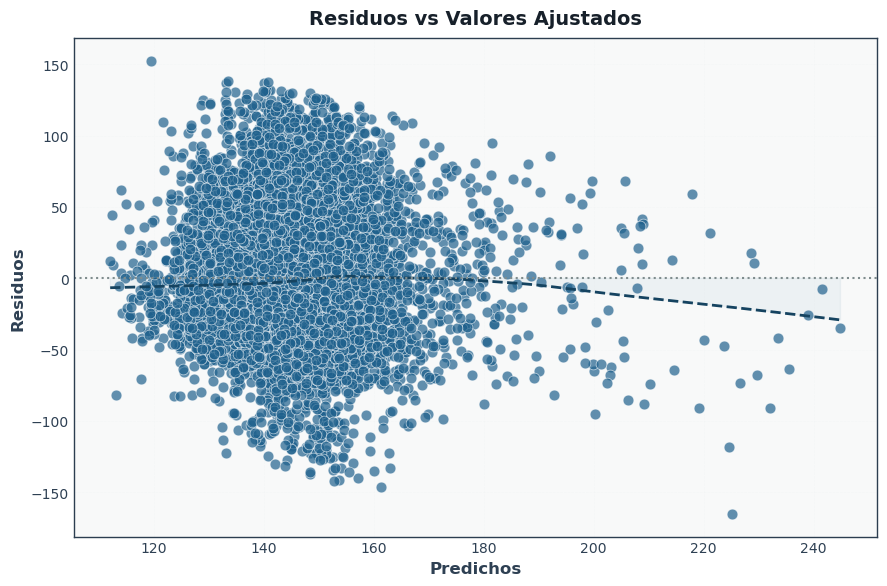

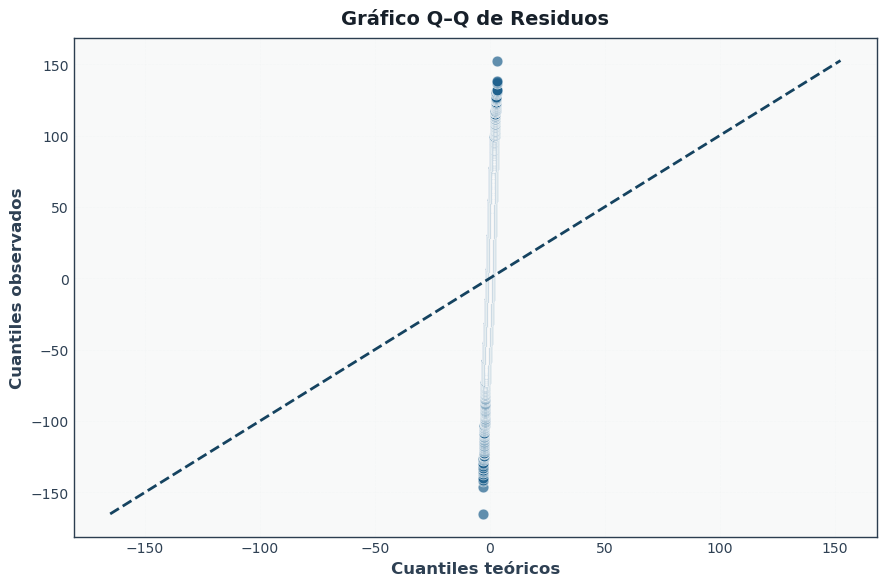

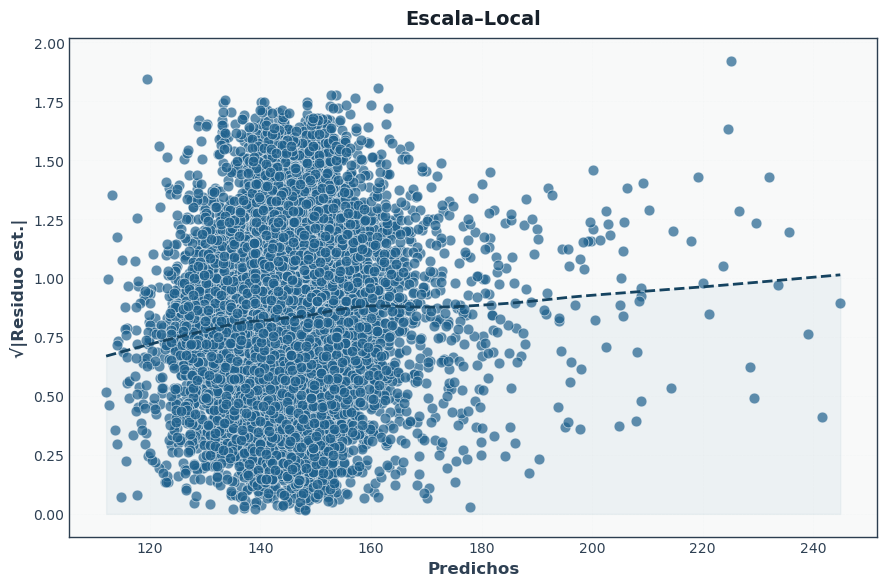

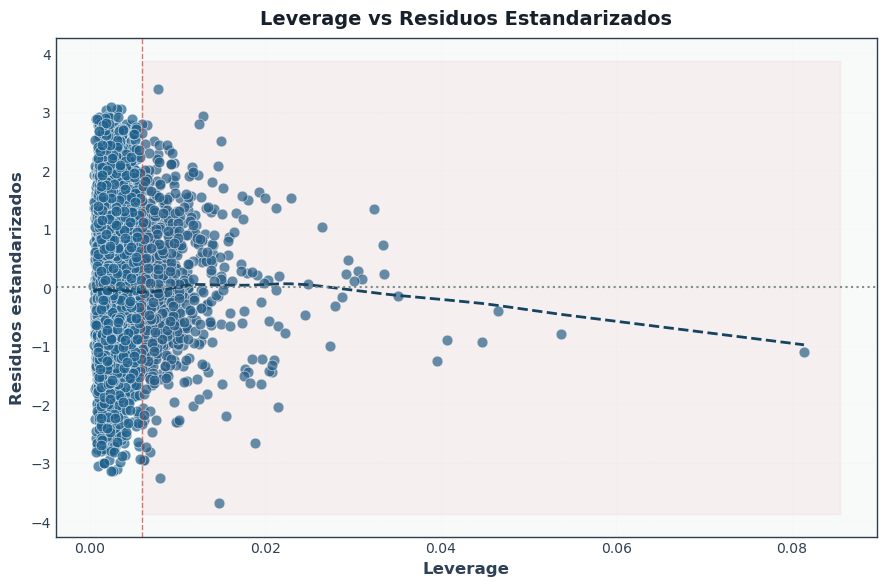

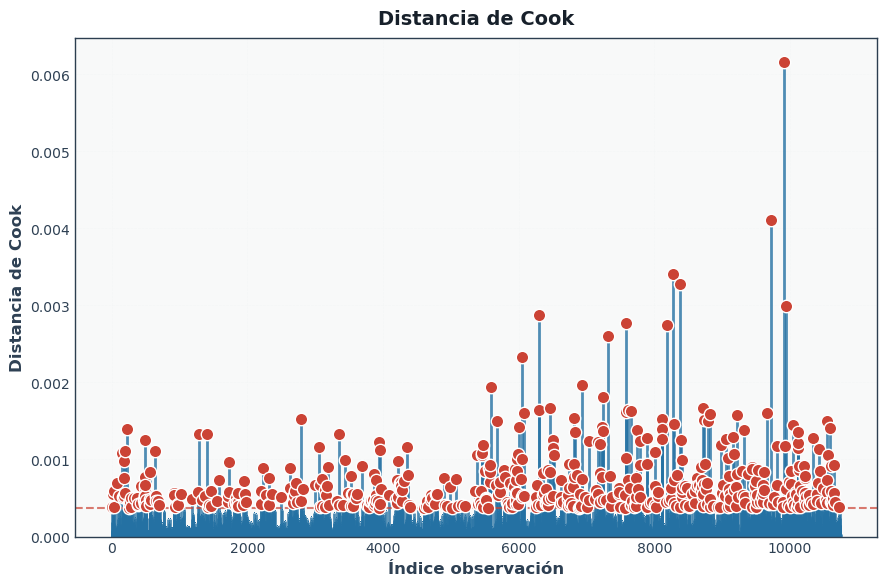

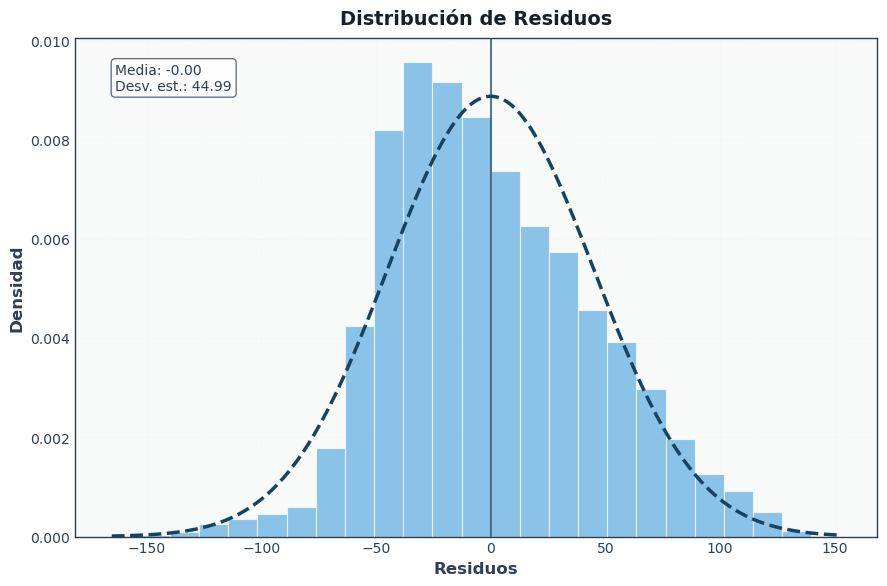

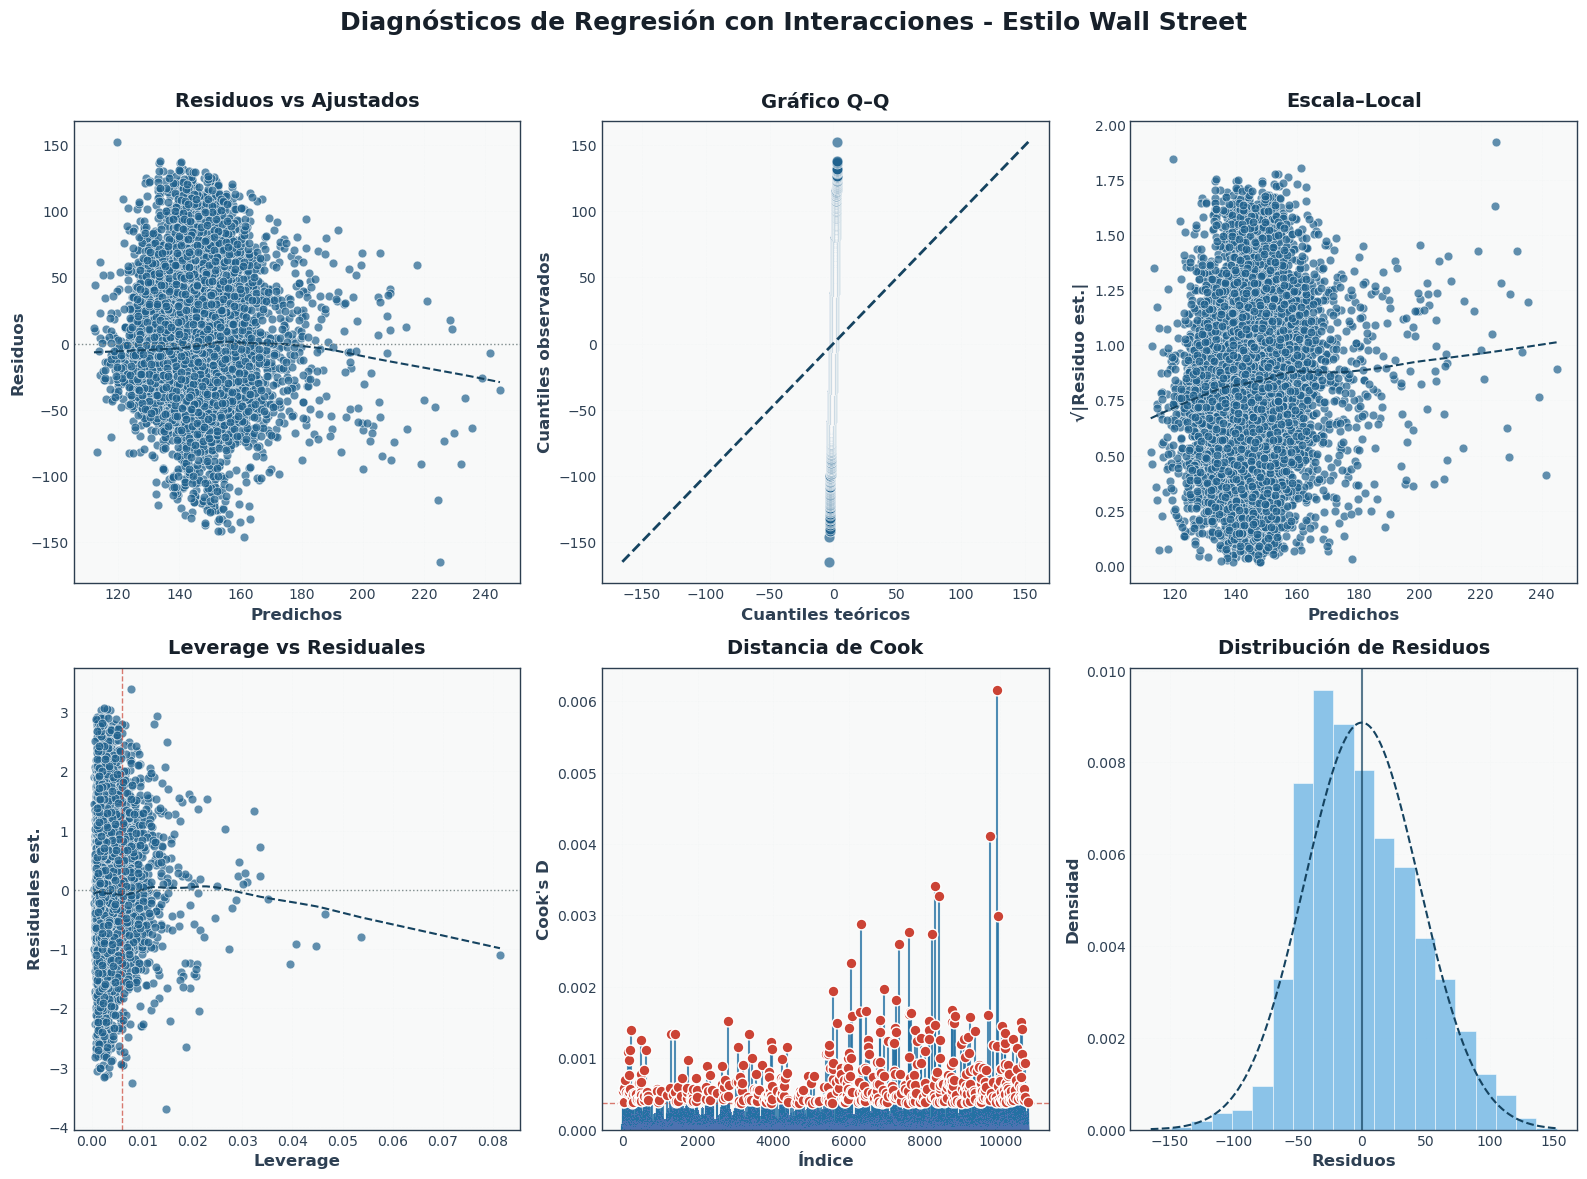

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from scipy import stats
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

# === Configuración de estilo "Wall Street" mejorado ===
plt.style.use('seaborn-v0_8-whitegrid')

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.dpi': 100,
    'figure.figsize': (8, 5),
    'axes.facecolor': 'white',
    'axes.edgecolor': '#2E4053',
    'axes.labelcolor': '#2E4053',
    'axes.grid': True,
    'grid.color': '#ECF0F1',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'xtick.color': '#2E4053',
    'ytick.color': '#2E4053',
    'text.color': '#2E4053',
    'figure.facecolor': 'white',
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

col = {
    'puntos': '#1F618D',
    'puntos_alpha': 0.7,
    'lowess': '#154360',
    'hist': '#5DADE2',
    'stem': '#2471A3',
    'linea_cero': '#7F8C8D',
    'titulo': '#17202A',
    'grid': '#ECF0F1',
    'borde': '#2C3E50',
    'fondo_panel': '#F8F9F9'
}

def estilo_comun(ax, titulo):
    ax.set_facecolor(col['fondo_panel'])
    for spine in ax.spines.values():
        spine.set_color(col['borde'])
        spine.set_linewidth(1.0)
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    ax.grid(True, alpha=0.3)
    ax.set_title(titulo, fontweight='bold', color=col['titulo'], pad=10)

def qqplot_custom(data, ax):
    q = np.linspace(0.001, 0.999, len(data))
    y = np.sort(data)
    x = stats.norm.ppf(q)
    ax.scatter(x, y, alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
    mn, mx = min(x.min(), y.min()), max(x.max(), y.max())
    ax.plot([mn, mx], [mn, mx], linestyle='--', color=col['lowess'], lw=2)
    return ax

# === Paso 1: Preparar datos e incorporar interacciones ===
df = best_of_five.copy()
y = df['minutes']

# Reconstruir categoría surface
df['surface_cat'] = np.select(
    [df['surface_Grass']==1, df['surface_Hard']==1],
    ['Grass','Hard'],
    default='Clay'
)

# Variables numéricas base
X_base = df[['age_diff', 'close_ranking', 'l_avg_ace', 'l_avg_df',
             'loser_ht', 'loser_rank_points', 'w_avg_ace', 'w_avg_df',
             'winner_ht', 'winner_rank_points']]

# Dummies de surface (Clay como referencia)
dummies = pd.get_dummies(df['surface_cat'], drop_first=True)

# Crear interacciones: cada X_base * cada dummy
interacciones = pd.DataFrame({
    f"{col}:{surf}": X_base[col] * dummies[surf]
    for col in X_base.columns
    for surf in dummies.columns
})

# Matriz final de predictores
X = pd.concat([dummies, X_base, interacciones], axis=1)
X_const = sm.add_constant(X)


# 1) Diagnóstico: ¿qué columnas no son numéricas?
print("Tipos en X_const:\n", X_const.dtypes)

# 2) Opción A: convertir TODO a float (fallará si hay texto puro)
X_const = X_const.astype(float)

# -- o bien --

# 2) Opción B: quedarte solo con columnas numéricas
X_const = X_const.select_dtypes(include=[np.number])

# ---------------------------------------------------------------
# Y ahora sí, ajustas tu OLS:
model = sm.OLS(y, X_const).fit()

# === Paso 2: Resumen + Durbin–Watson ===
print(model.summary())
print(f"Durbin–Watson: {sms.durbin_watson(model.resid):.3f}")

# === Paso 3: Cálculos diagnósticos ===
fitted    = model.fittedvalues
resid     = model.resid
std_resid = model.get_influence().resid_studentized_internal
leverage  = model.get_influence().hat_matrix_diag
cooks     = np.array(OLSInfluence(model).cooks_distance[0])

# === Paso 4: VIF ===
vif = pd.DataFrame({
    'Variable': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})
print("\nFactores de Inflación de Varianza:")
print(vif.round(2))

# === Paso 5: Gráficos diagnósticos mejorados ===

# 1. Residuos vs Ajustados
plt.figure(figsize=(9,6))
ax = plt.gca()
ax.scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
low = sm.nonparametric.lowess(resid, fitted)
ax.plot(low[:,0], low[:,1], linestyle='--', color=col['lowess'], lw=2)
ax.axhline(0, linestyle=':', color=col['linea_cero'], lw=1.5)
ax.set_xlabel("Predichos", fontweight='bold')
ax.set_ylabel("Residuos", fontweight='bold')
estilo_comun(ax, "Residuos vs Valores Ajustados")
ax.fill_between(low[:,0], low[:,1], 0, where=low[:,1]>0, interpolate=True, color=col['puntos'], alpha=0.05)
ax.fill_between(low[:,0], low[:,1], 0, where=low[:,1]<0, interpolate=True, color=col['puntos'], alpha=0.05)
plt.tight_layout(); plt.show()

# 2. Q–Q Plot
plt.figure(figsize=(9,6))
ax = plt.gca()
qqplot_custom(resid, ax)
ax.set_xlabel("Cuantiles teóricos", fontweight='bold')
ax.set_ylabel("Cuantiles observados", fontweight='bold')
estilo_comun(ax, "Gráfico Q–Q de Residuos")
plt.tight_layout(); plt.show()

# 3. Escala–Local
plt.figure(figsize=(9,6))
ax = plt.gca()
ax.scatter(fitted, np.sqrt(np.abs(std_resid)), alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
ax.plot(low2[:,0], low2[:,1], linestyle='--', color=col['lowess'], lw=2)
ax.set_xlabel("Predichos", fontweight='bold')
ax.set_ylabel("√|Residuo est.|", fontweight='bold')
estilo_comun(ax, "Escala–Local")
ax.fill_between(low2[:,0], low2[:,1], 0, interpolate=True, color=col['puntos'], alpha=0.05)
plt.tight_layout(); plt.show()

# 4. Leverage vs Residuos estandarizados
plt.figure(figsize=(9,6))
ax = plt.gca()
ax.scatter(leverage, std_resid, alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
low3 = sm.nonparametric.lowess(std_resid, leverage)
ax.plot(low3[:,0], low3[:,1], linestyle='--', color=col['lowess'], lw=2)
ax.axhline(0, linestyle=':', color=col['linea_cero'], lw=1.5)
p, n = X.shape[1]-1, len(df)
th_leverage = 2*(p+1)/n
ax.axvline(th_leverage, color='#CB4335', linestyle='--', lw=1, alpha=0.7)
ax.set_xlabel("Leverage", fontweight='bold')
ax.set_ylabel("Residuos estandarizados", fontweight='bold')
estilo_comun(ax, "Leverage vs Residuos Estandarizados")
ax.fill_between([th_leverage, max(leverage)*1.05], [-max(abs(std_resid))*1.05]*2, [max(abs(std_resid))*1.05]*2, color='#CB4335', alpha=0.05)
plt.tight_layout(); plt.show()

# 5. Distancia de Cook
plt.figure(figsize=(9,6))
ax = plt.gca()
ax.bar(np.arange(len(cooks)), cooks, color=col['hist'], alpha=0.3, width=0.8)
ml, sl, bl = ax.stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.setp(sl, 'color', col['stem'], 'linewidth', 2, 'alpha', 0.8)
plt.setp(ml, 'color', col['stem'], 'markersize', 6)
th_cook = 4/len(cooks)
ax.axhline(th_cook, color='#CB4335', linestyle='--', lw=1.5, alpha=0.7)
infl = np.where(cooks>th_cook)[0]
if infl.size>0:
    ax.scatter(infl, cooks[infl], color='#CB4335', s=80, zorder=3, edgecolor='white')
ax.set_xlabel("Índice observación", fontweight='bold')
ax.set_ylabel("Distancia de Cook", fontweight='bold')
estilo_comun(ax, "Distancia de Cook")
plt.tight_layout(); plt.show()

# 6. Histograma de residuos
plt.figure(figsize=(9,6))
ax = plt.gca()
n, bins, patches = ax.hist(resid, bins=25, density=True, alpha=0.7, color=col['hist'], edgecolor='white', lw=0.8)
x = np.linspace(bins.min(), bins.max(), 500)
y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
ax.plot(x, y, linestyle='--', color=col['lowess'], lw=2.5)
ax.axvline(resid.mean(), linestyle='-', color=col['lowess'], lw=1.5, alpha=0.7)
ax.set_xlabel("Residuos", fontweight='bold')
ax.set_ylabel("Densidad", fontweight='bold')
estilo_comun(ax, "Distribución de Residuos")
props = dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor=col['borde'])
ax.text(0.05, 0.95, f"Media: {resid.mean():.2f}\nDesv. est.: {resid.std():.2f}", transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.tight_layout(); plt.show()

# === Bonus: Panel combinado ===
plt.figure(figsize=(16,12))
gs = GridSpec(2,3,figure=plt.gcf())

axes = [plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]),
        plt.subplot(gs[1,0]), plt.subplot(gs[1,1]), plt.subplot(gs[1,2])]

# 1. Residuos vs Ajustados
axes[0].scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], s=40, edgecolor='white', lw=0.5)
low = sm.nonparametric.lowess(resid, fitted)
axes[0].plot(low[:,0], low[:,1], linestyle='--', color=col['lowess'], lw=1.5)
axes[0].axhline(0, linestyle=':', color=col['linea_cero'], lw=1)
axes[0].set_xlabel("Predichos", fontweight='bold'); axes[0].set_ylabel("Residuos", fontweight='bold')
estilo_comun(axes[0], "Residuos vs Ajustados")

# 2. Q–Q
qqplot_custom(resid, axes[1])
axes[1].set_xlabel("Cuantiles teóricos", fontweight='bold'); axes[1].set_ylabel("Cuantiles observados", fontweight='bold')
estilo_comun(axes[1], "Gráfico Q–Q")

# 3. Escala–Local
axes[2].scatter(fitted, np.sqrt(np.abs(std_resid)), alpha=col['puntos_alpha'], color=col['puntos'], s=40, edgecolor='white', lw=0.5)
low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
axes[2].plot(low2[:,0], low2[:,1], linestyle='--', color=col['lowess'], lw=1.5)
axes[2].set_xlabel("Predichos", fontweight='bold'); axes[2].set_ylabel("√|Residuo est.|", fontweight='bold')
estilo_comun(axes[2], "Escala–Local")

# 4. Leverage vs Residuales
axes[3].scatter(leverage, std_resid, alpha=col['puntos_alpha'], color=col['puntos'], s=40, edgecolor='white', lw=0.5)
low3 = sm.nonparametric.lowess(std_resid, leverage)
axes[3].plot(low3[:,0], low3[:,1], linestyle='--', color=col['lowess'], lw=1.5)
axes[3].axhline(0, linestyle=':', color=col['linea_cero'], lw=1)
axes[3].axvline(th_leverage, color='#CB4335', linestyle='--', lw=1, alpha=0.7)
axes[3].set_xlabel("Leverage", fontweight='bold'); axes[3].set_ylabel("Residuales est.", fontweight='bold')
estilo_comun(axes[3], "Leverage vs Residuales")

# 5. Cook
axes[4].bar(np.arange(len(cooks)), cooks, color=col['hist'], alpha=0.3, width=0.8)
ml, sl, bl = axes[4].stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.setp(sl, 'color', col['stem'], 'linewidth', 1.5, 'alpha', 0.8)
axes[4].axhline(th_cook, linestyle='--', color='#CB4335', lw=1, alpha=0.7)
infl = np.where(cooks>th_cook)[0]
if infl.size>0:
    axes[4].scatter(infl, cooks[infl], color='#CB4335', s=60, zorder=3, edgecolor='white')
axes[4].set_xlabel("Índice", fontweight='bold'); axes[4].set_ylabel("Cook's D", fontweight='bold')
estilo_comun(axes[4], "Distancia de Cook")

# 6. Histograma
n, bins, patches = axes[5].hist(resid, bins=20, density=True, alpha=0.7, color=col['hist'], edgecolor='white', lw=0.5)
x = np.linspace(bins.min(), bins.max(), 500)
y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
axes[5].plot(x, y, linestyle='--', color=col['lowess'], lw=1.5)
axes[5].axvline(resid.mean(), linestyle='-', color=col['lowess'], lw=1.5, alpha=0.7)
axes[5].set_xlabel("Residuos", fontweight='bold'); axes[5].set_ylabel("Densidad", fontweight='bold')
estilo_comun(axes[5], "Distribución de Residuos")

plt.suptitle("Diagnósticos de Regresión con Interacciones - Estilo Wall Street", fontsize=18, fontweight='bold', color=col['titulo'], y=0.98)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


# GLM Gamma

## Fundamento matemático del GLM Gamma con enlace log

### 1. Formulación general de un GLM

Un Modelo Lineal Generalizado (GLM) consta de tres componentes:

1. **Familia de distribuciones**  
   Se asume que cada observación $y_i$ sigue una distribución de la familia exponencial. En nuestro caso,  
   $$
   y_i \sim \mathrm{Gamma}(\alpha, \beta_i),
   $$
   donde $\alpha$ es el parámetro de forma (común a todas las observaciones) y $\beta_i$ el parámetro de escala inversa o tasa, que puede variar con $i$.

2. **Estructura de media y varianza**  
   Para la Gamma,  
   $$
   \mathbb{E}[y_i] = \mu_i, 
   \quad
   \mathrm{Var}(y_i) = \frac{\mu_i^2}{\alpha}.
   $$
   Aquí $\mu_i = 1/\beta_i$.

3. **Link function**  
   Se elige una función de enlace $g(\cdot)$ que conecte la media $\mu_i$ con un predictor lineal:
   $$
   g(\mu_i) = \eta_i = \mathbf{x}_i^\top \boldsymbol\beta,
   $$
   donde $\mathbf{x}_i$ es el vector de covariables (con constante) y $\boldsymbol\beta$ el vector de coeficientes. En nuestro ajuste usamos el **enlace log**,
   $$
   g(\mu) = \log(\mu),
   \quad
   \mu_i = \exp(\,\mathbf{x}_i^\top \boldsymbol\beta\,).
   $$

---

### 2. Función de verosimilitud

La densidad de probabilidad de la Gamma (en la forma de la familia exponencial) se puede escribir como:
$$
f(y_i;\,\alpha,\beta_i)
= \frac{\beta_i^\alpha}{\Gamma(\alpha)}\,y_i^{\alpha-1}\,e^{-\beta_i y_i}.
$$
Con $\mu_i = \alpha/\beta_i$, la verosimilitud conjunta para $n$ observaciones es
$$
L(\boldsymbol\beta,\alpha)
= \prod_{i=1}^n
  \frac{(\alpha/\mu_i)^\alpha}{\Gamma(\alpha)}
  \,y_i^{\alpha-1}\,
  \exp\!\Bigl(-\tfrac{\alpha}{\mu_i}y_i\Bigr).
$$
Tomando log‐verosimilitud y simplificando:
$$
\ell(\boldsymbol\beta,\alpha)
= \sum_{i=1}^n \Bigl[
    \alpha\log\alpha 
  - \alpha\log\mu_i
  - \log\Gamma(\alpha)
  + (\alpha-1)\log y_i
  - \tfrac{\alpha}{\mu_i}y_i
\Bigr].
$$

---

### 3. Estimación por máxima verosimilitud

Para estimar $\boldsymbol\beta$ (y $\alpha$), se maximizan $\ell(\boldsymbol\beta,\alpha)$.  
- Con enlace log, $\mu_i = \exp(\mathbf{x}_i^\top\boldsymbol\beta)$ simplifica gradientes.  
- El algoritmo IRLS (Iteratively Reweighted Least Squares) resuelve esto de manera eficiente, aprovechando la estructura de la familia exponencial.

---

### 4. Residuos y diagnósticos

Tras el ajuste, definimos:

1. **Residuos de deviance**  
   $$
   d_i = 2\left[
     \ell(y_i;\,y_i) - \ell(y_i;\,\widehat\mu_i)
   \right],
   $$
   que mide la discrepancia de cada observación frente al modelo ajustado.

2. **Residuos de Pearson**  
   $$
   r_i = \frac{y_i - \widehat\mu_i}{\sqrt{\mathrm{Var}(y_i)}}
   = \frac{y_i - \widehat\mu_i}{\widehat\mu_i/\sqrt{\widehat\alpha}}.
   $$

Estos residuos se usan en los gráficos de diagnóstico para verificar:
- **Heterocedasticidad**: patrón en residuos vs ajustados.
- **No‐normalidad**: en Q–Q plots de residuos.
- **Influencia**: detección de outliers y leverage.

---

### 5. Ventajas del GLM Gamma con enlace log

- **Adaptado a datos positivos y sesgados** como duraciones de partidos (no negativos, a menudo asimétricos).  
- **Varianza creciente** en proporción al cuadrado de la media ($\mathrm{Var}(y)\propto \mu^2$), consistente con duración de partidos más largos más variables.  
- **Enlace log** garantiza $\widehat\mu_i>0$ y modelo multiplicativo de efectos (`exp` de combinación lineal).

Con este fundamento, el ajuste GLM Gamma con enlace log es matemáticamente coherente para modelar la variable `minutes`, proporcionando estimaciones robustas y diagnósticos apropiados para datos de duración.

/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                minutes   No. Observations:                10746
Model:                            GLM   Df Residuals:                    10733
Model Family:                   Gamma   Df Model:                           12
Link Function:                    log   Scale:                        0.096283
Method:                          IRLS   Log-Likelihood:                -56177.
Date:                Wed, 21 May 2025   Deviance:                       1129.9
Time:                        13:04:08   Pearson chi2:                 1.03e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.05128
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7558      0

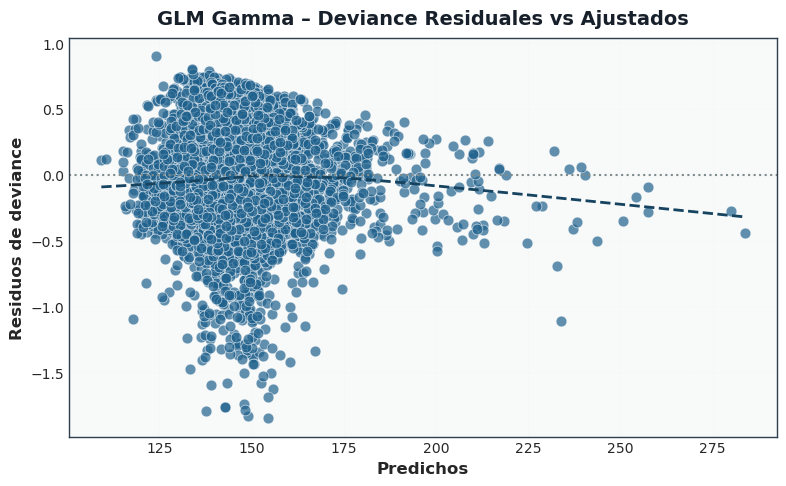

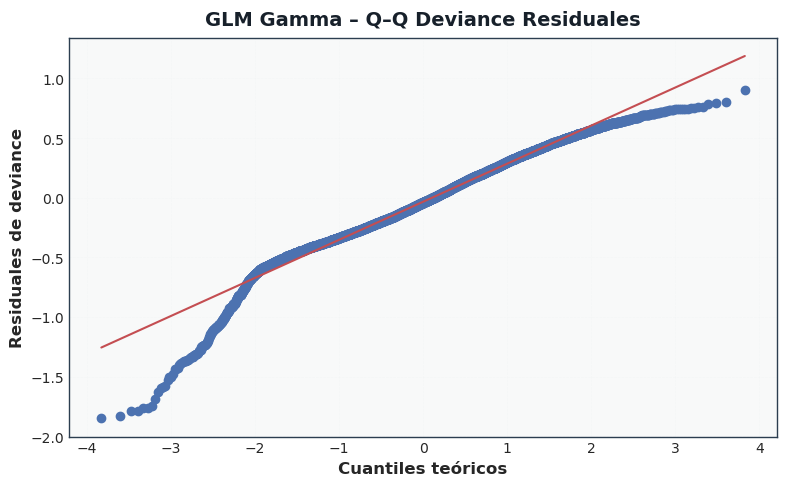

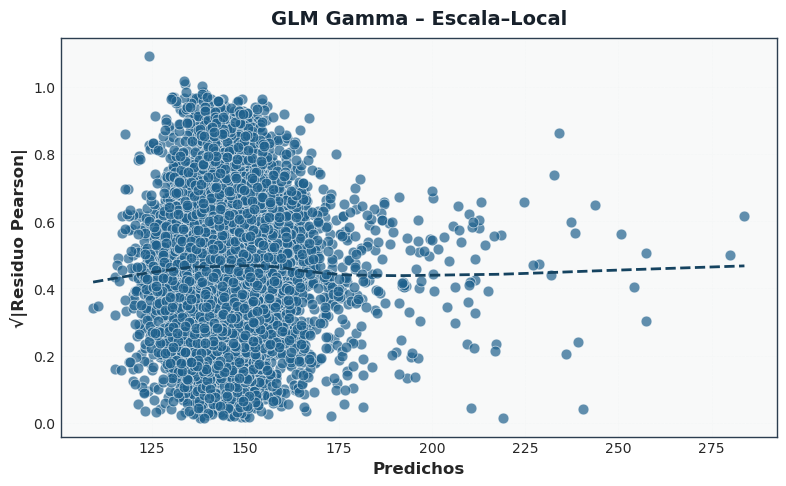

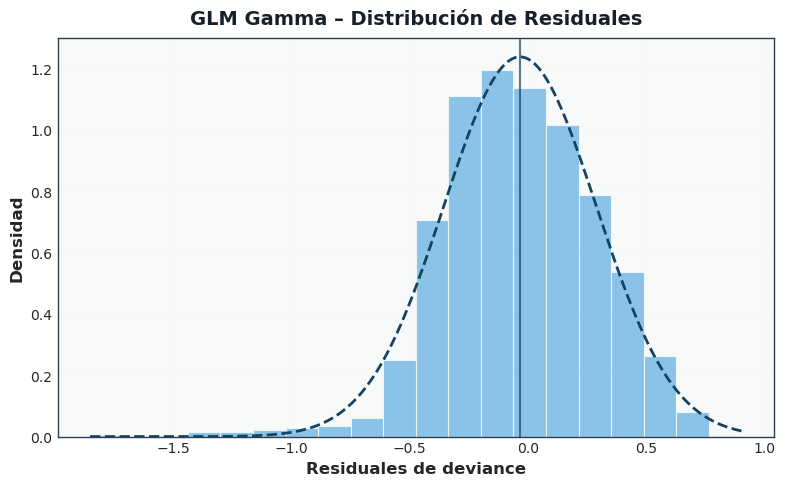

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# === (Reusa tu configuración de estilo "Wall Street") ===
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial','DejaVu Sans','Liberation Sans'],
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100,
    'figure.figsize': (8,5),
    'axes.facecolor': 'white',
    'grid.color': '#ECF0F1',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5
})

col = {
    'puntos': '#1F618D',
    'puntos_alpha': 0.7,
    'lowess': '#154360',
    'hist': '#5DADE2',
    'linea_cero': '#7F8C8D',
    'titulo': '#17202A',
    'borde': '#2C3E50',
    'fondo_panel': '#F8F9F9'
}

def estilo_comun(ax, titulo):
    ax.set_facecolor(col['fondo_panel'])
    for spine in ax.spines.values():
        spine.set_color(col['borde'])
        spine.set_linewidth(1.0)
    ax.tick_params(direction='in', length=5)
    ax.grid(True, alpha=0.3)
    ax.set_title(titulo, fontweight='bold', color=col['titulo'], pad=10)

# === Paso 1: Cargar datos y definir y, X ===
df = best_of_five.copy()
y = df['minutes']
X = df.drop(columns=['minutes'])
X_const = sm.add_constant(X)

# === Paso 2: Ajustar GLM Gamma con link log ===
glm_gamma = sm.GLM(
    y,
    X_const,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

# === Paso 3: Mostrar resumen ===
print(glm_gamma.summary())

# === Paso 4: Calcular residuos ===
fitted     = glm_gamma.fittedvalues
resid_dev  = glm_gamma.resid_deviance
resid_pear = glm_gamma.resid_pearson

# === Paso 5: Gráficos diagnósticos ===

# 5.1 Residuos de deviance vs ajustados
plt.figure(figsize=(8,5))
ax = plt.gca()
ax.scatter(fitted, resid_dev,
           alpha=col['puntos_alpha'],
           color=col['puntos'], s=60,
           edgecolor='white', linewidth=0.5)
low = sm.nonparametric.lowess(resid_dev, fitted)
ax.plot(low[:,0], low[:,1], '--', color=col['lowess'], linewidth=2)
# Línea horizontal corregida:
ax.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1.5)
ax.set_xlabel("Predichos", fontweight='bold')
ax.set_ylabel("Residuos de deviance", fontweight='bold')
estilo_comun(ax, "GLM Gamma – Deviance Residuales vs Ajustados")
plt.tight_layout()
plt.show()

# 5.2 Q–Q plot de residuos de deviance
plt.figure(figsize=(8,5))
ax = plt.gca()
stats.probplot(resid_dev, dist="norm", plot=ax)
ax.set_xlabel("Cuantiles teóricos", fontweight='bold')
ax.set_ylabel("Residuales de deviance", fontweight='bold')
estilo_comun(ax, "GLM Gamma – Q–Q Deviance Residuales")
plt.tight_layout()
plt.show()

# 5.3 Escala–Local de residuos Pearson
plt.figure(figsize=(8,5))
ax = plt.gca()
ax.scatter(fitted, np.sqrt(np.abs(resid_pear)),
           alpha=col['puntos_alpha'],
           color=col['puntos'], s=60,
           edgecolor='white', linewidth=0.5)
low2 = sm.nonparametric.lowess(np.sqrt(np.abs(resid_pear)), fitted)
ax.plot(low2[:,0], low2[:,1], '--', color=col['lowess'], linewidth=2)
ax.set_xlabel("Predichos", fontweight='bold')
ax.set_ylabel("√|Residuo Pearson|", fontweight='bold')
estilo_comun(ax, "GLM Gamma – Escala–Local")
plt.tight_layout()
plt.show()

# 5.4 Histograma de residuos de deviance
plt.figure(figsize=(8,5))
ax = plt.gca()
n, bins, _ = ax.hist(resid_dev,
                     bins=20,
                     density=True,
                     alpha=0.7,
                     color=col['hist'],
                     edgecolor='white',
                     linewidth=0.8)
x = np.linspace(bins.min(), bins.max(), 200)
ax.plot(x,
        stats.norm.pdf(x,
                       loc=resid_dev.mean(),
                       scale=resid_dev.std()),
        '--', color=col['lowess'], linewidth=2)
ax.axvline(resid_dev.mean(),
           color=col['lowess'],
           linestyle='-',
           linewidth=1.5,
           alpha=0.7)
ax.set_xlabel("Residuales de deviance", fontweight='bold')
ax.set_ylabel("Densidad", fontweight='bold')
estilo_comun(ax, "GLM Gamma – Distribución de Residuales")
plt.tight_layout()
plt.show()


# Modelo Random forest y XG boost

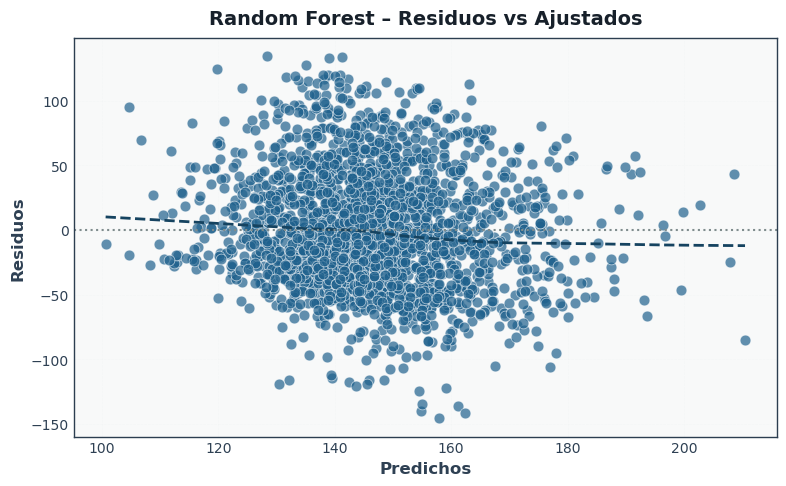

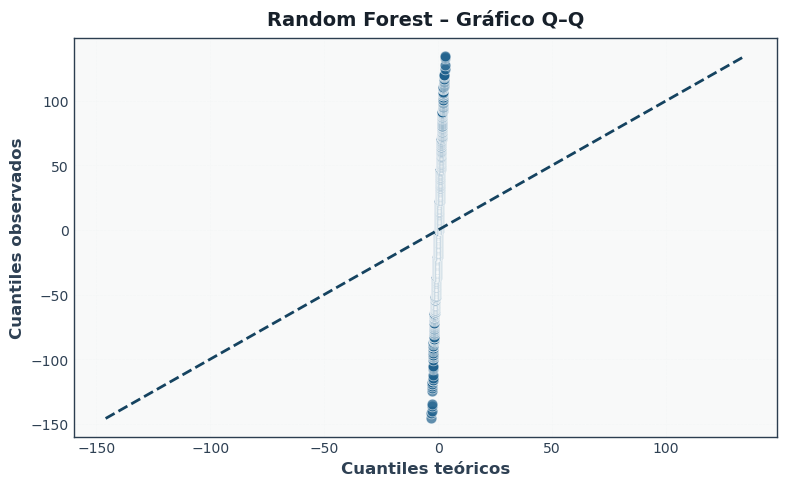

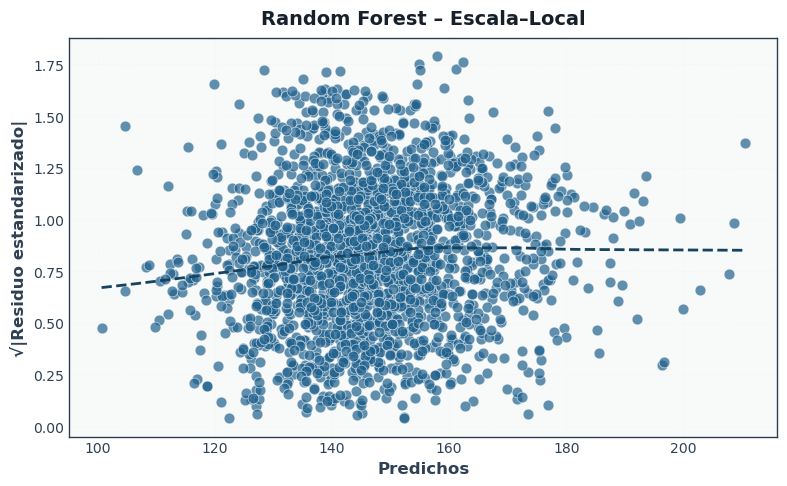

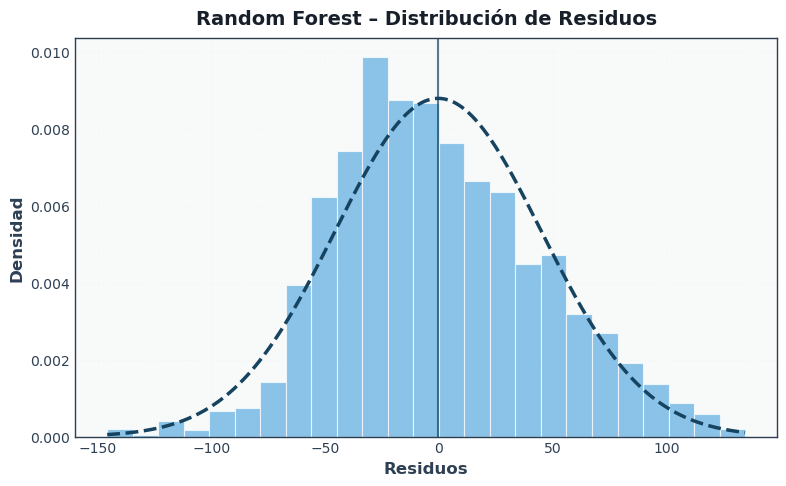

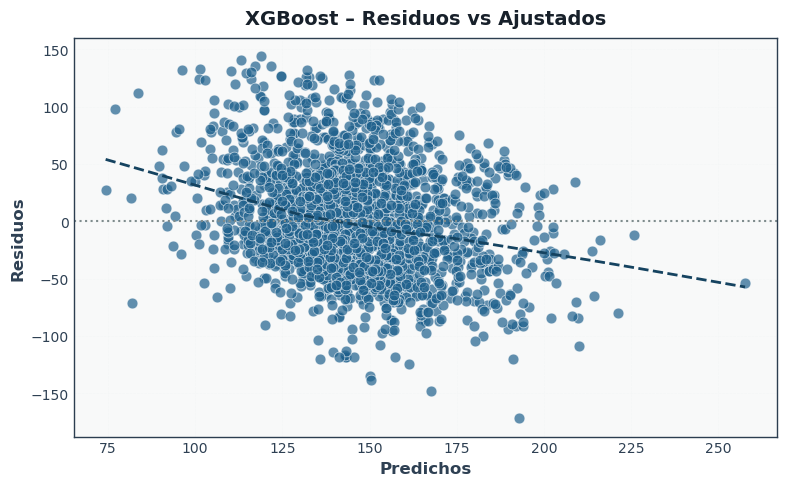

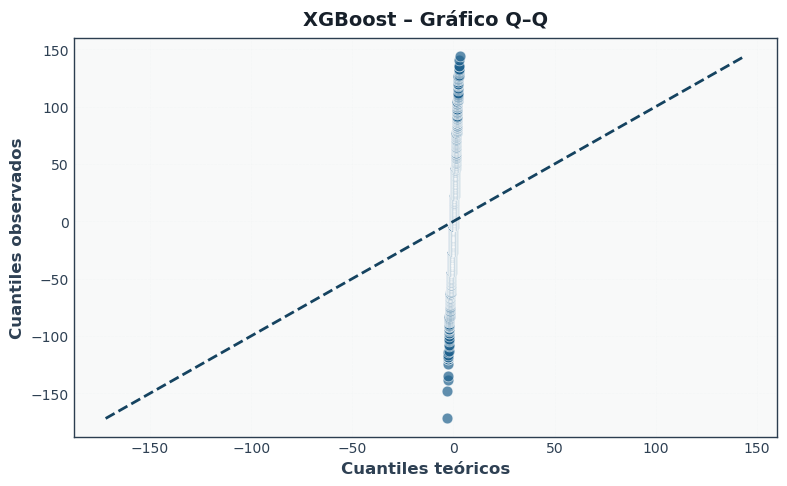

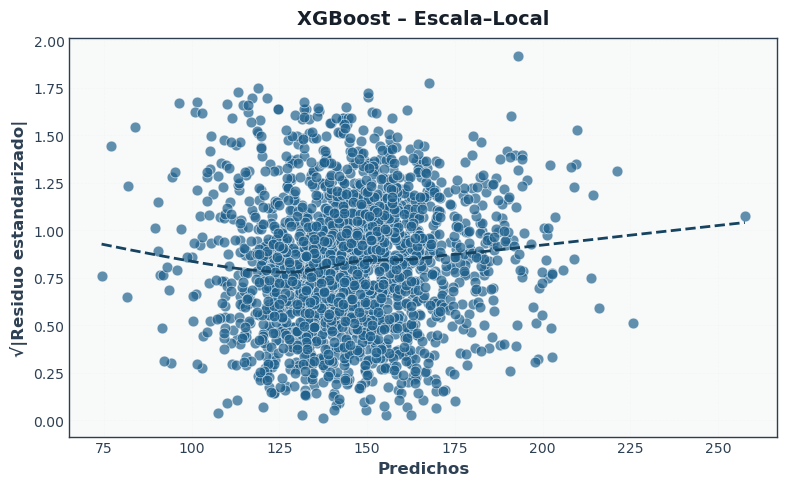

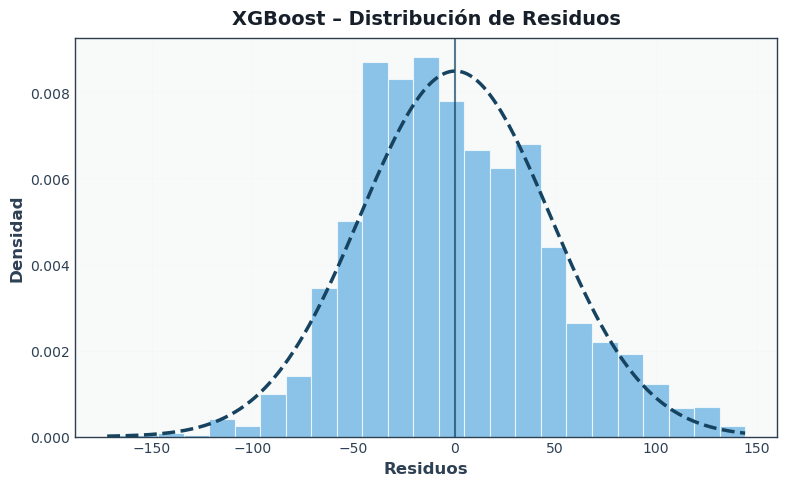

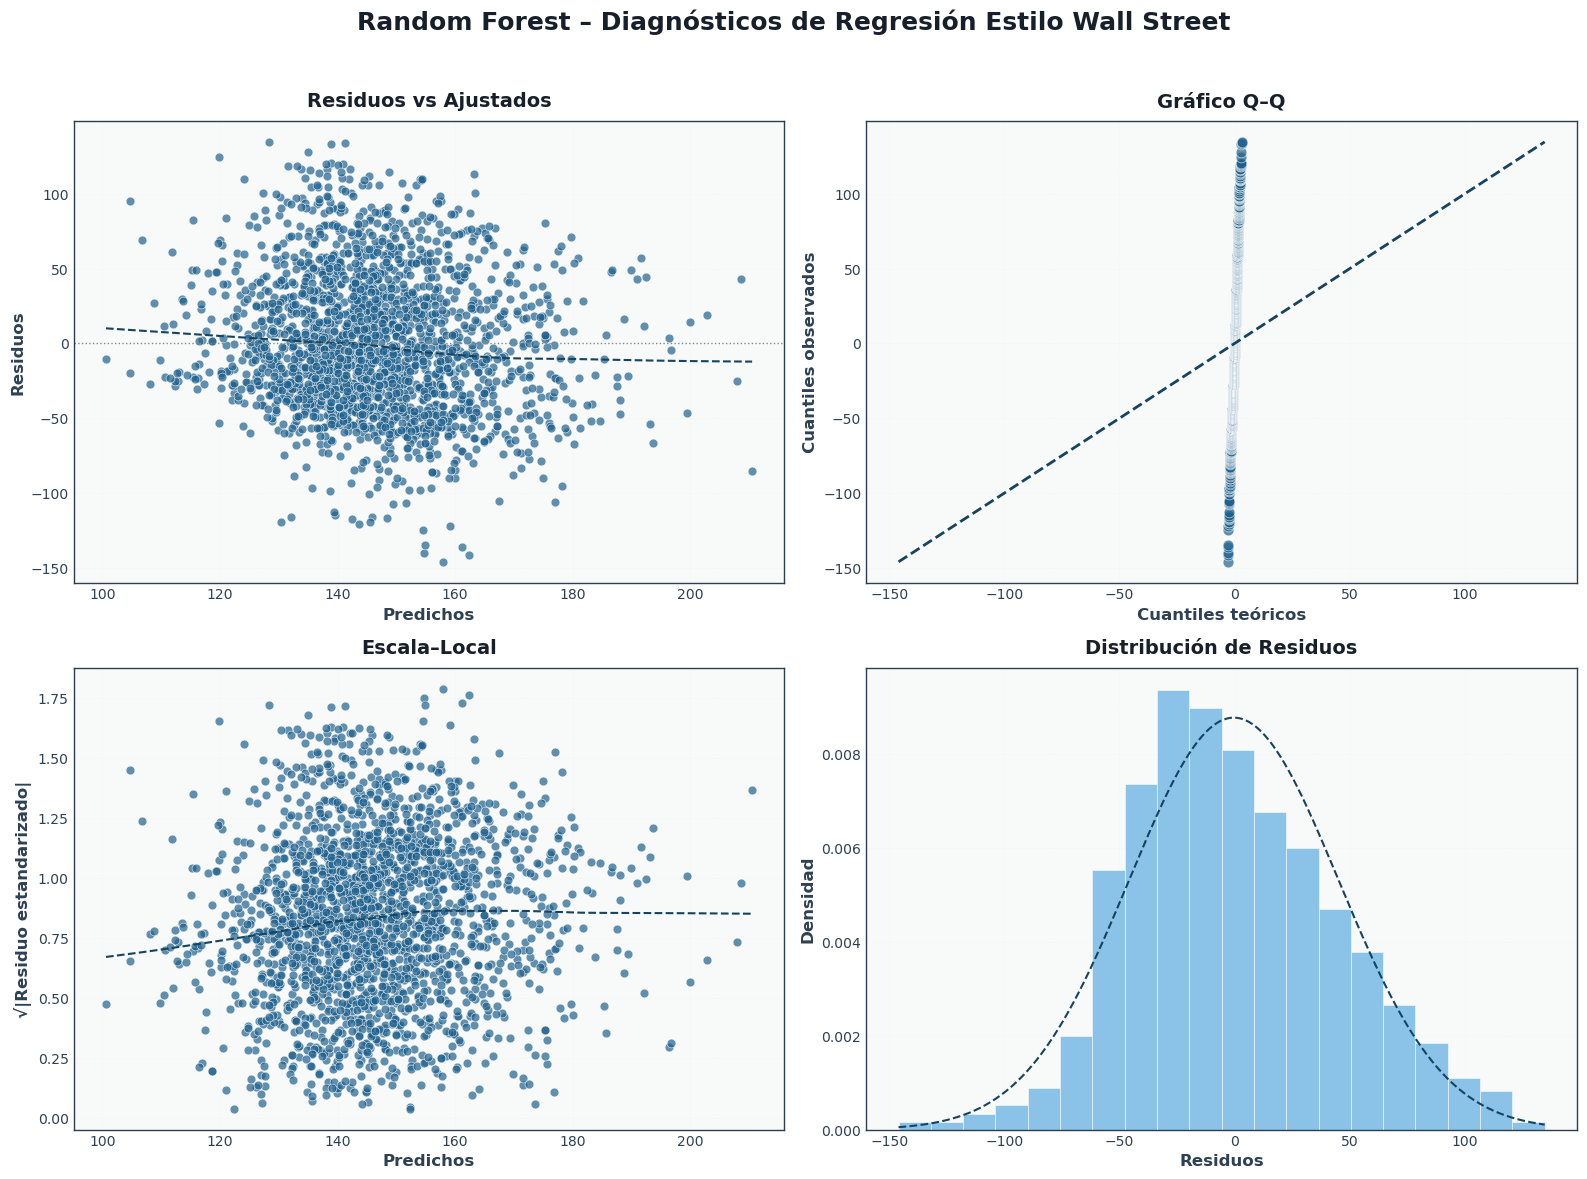

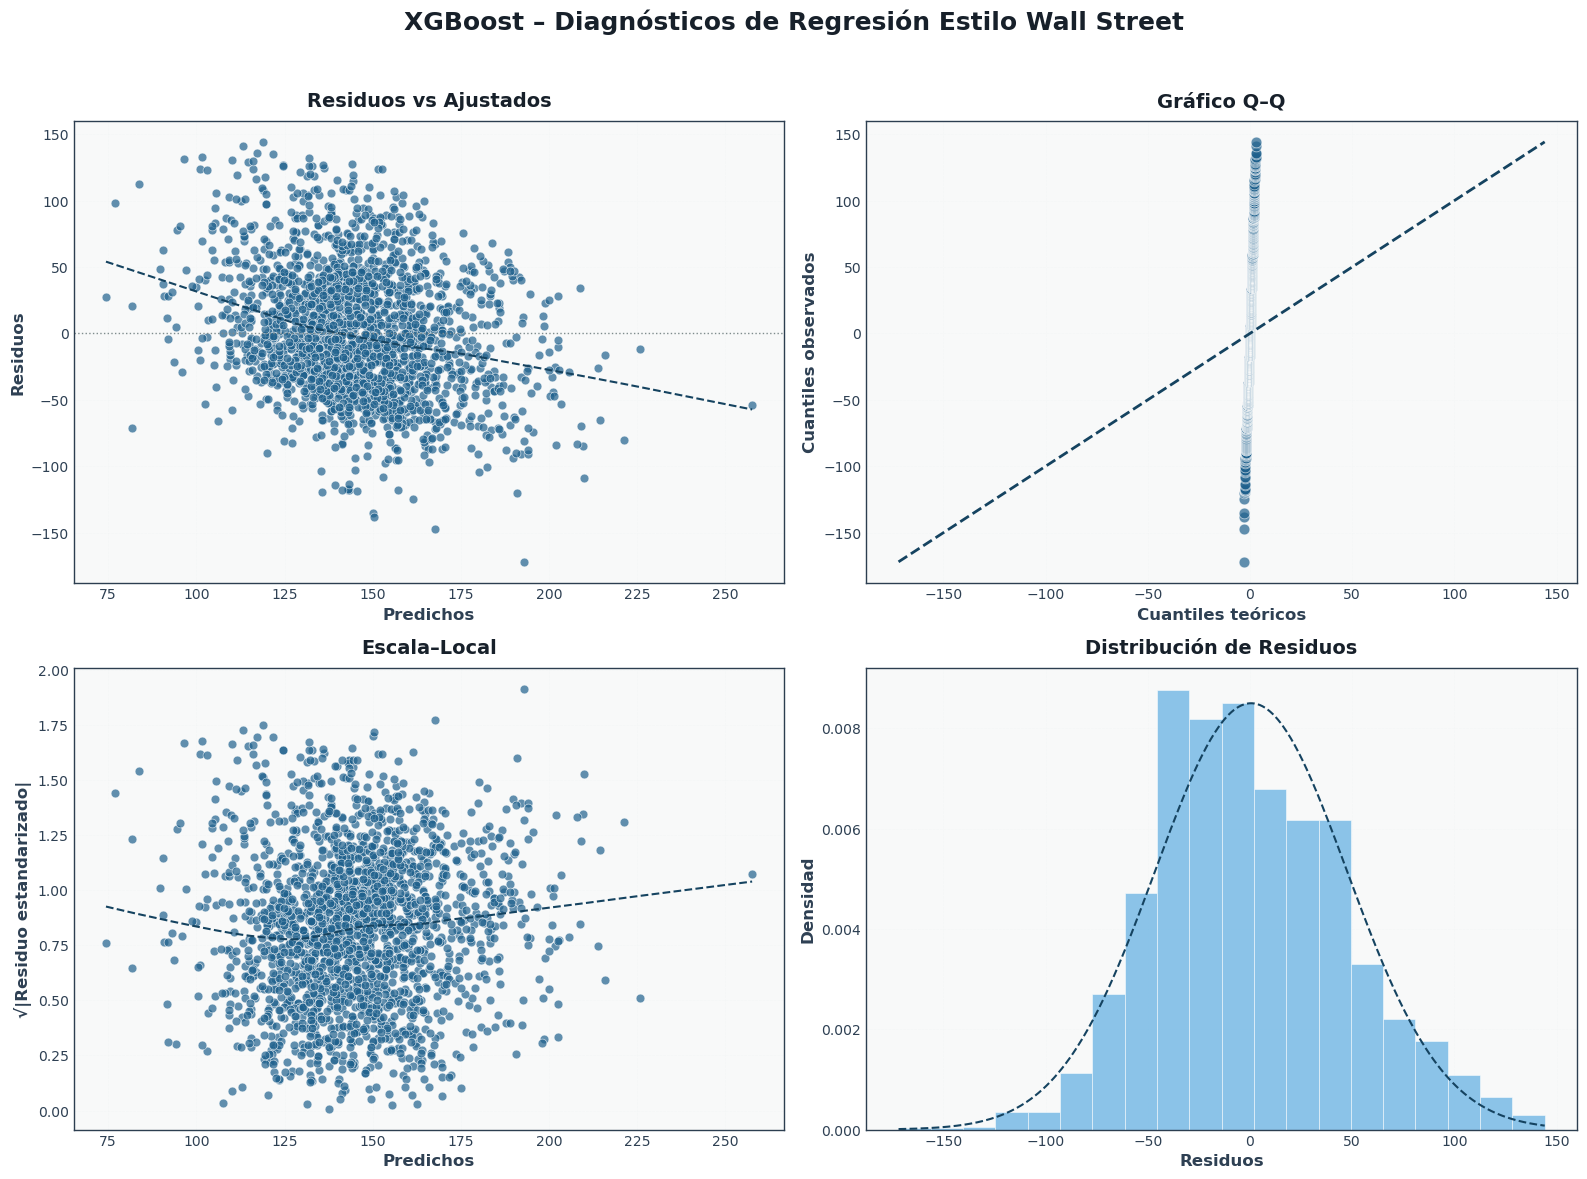

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from matplotlib.gridspec import GridSpec

# === Configuración de estilo "Wall Street" mejorado ===
plt.style.use('seaborn-v0_8-whitegrid')  # Base estilo seaborn como punto de partida

# Configuración de fuentes más profesionales - usando fuentes genéricas disponibles en todos los sistemas
plt.rcParams.update({
    'font.family': 'sans-serif',  # Cambiado de 'serif' a 'sans-serif' que está más disponible
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.dpi': 100,
    'figure.figsize': (8, 5),
    'axes.facecolor': 'white',
    'axes.edgecolor': '#2E4053',
    'axes.labelcolor': '#2E4053',
    'axes.grid': True,
    'grid.color': '#ECF0F1',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'xtick.color': '#2E4053',
    'ytick.color': '#2E4053',
    'text.color': '#2E4053',
    'figure.facecolor': 'white',
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Paleta de azules para estilo financiero/Wall Street
col = {
    'puntos': '#1F618D',       # Azul oscuro para puntos
    'puntos_alpha': 0.7,       # Transparencia
    'lowess': '#154360',       # Azul más oscuro para líneas de tendencia
    'hist': '#5DADE2',         # Azul medio para histogramas
    'stem': '#2471A3',         # Azul intenso para gráficos de tallo
    'linea_cero': '#7F8C8D',   # Gris para líneas de referencia
    'titulo': '#17202A',       # Casi negro para títulos
    'grid': '#ECF0F1',         # Gris muy claro para cuadrículas
    'borde': '#2C3E50',        # Azul oscuro para bordes
    'fondo_panel': '#F8F9F9'   # Gris muy claro para fondo de paneles
}

def estilo_comun(ax, titulo):
    ax.set_facecolor(col['fondo_panel'])
    for spine in ax.spines.values():
        spine.set_color(col['borde'])
        spine.set_linewidth(1.0)
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    ax.grid(True, alpha=0.3)
    ax.set_title(titulo, fontweight='bold', color=col['titulo'], pad=10)

def qqplot_custom(data, ax):
    q = np.linspace(0.001, 0.999, len(data))
    y = np.sort(data)
    x = stats.norm.ppf(q)
    ax.scatter(x, y, alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
    mn, mx = min(x.min(), y.min()), max(x.max(), y.max())
    ax.plot([mn, mx], [mn, mx], linestyle='--', color=col['lowess'], lw=2)
    return ax

# === Paso 1: Preparar datos y dividir en train/test ===
df = best_of_five.copy()
y = df['minutes']
X = df.drop(columns=['minutes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Paso 2: Definir y entrenar modelos ===
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    resid = y_test - preds
    # residuos estandarizados aproximados
    std_resid = (resid - resid.mean()) / resid.std()
    results[name] = {
        'fitted': preds,
        'resid': resid.values,
        'std_resid': std_resid.values
    }

# === Paso 3: Graficar diagnósticos por modelo ===
for name, res in results.items():
    fitted = res['fitted']
    resid = res['resid']
    std_resid = res['std_resid']

    # Residuals vs Fitted
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    ax.scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
    low = sm.nonparametric.lowess(resid, fitted)
    ax.plot(low[:,0], low[:,1], linestyle='--', color=col['lowess'], lw=2)
    ax.axhline(0, linestyle=':', color=col['linea_cero'], lw=1.5)
    ax.set_xlabel("Predichos", fontweight='bold')
    ax.set_ylabel("Residuos", fontweight='bold')
    estilo_comun(ax, f"{name} – Residuos vs Ajustados")
    plt.tight_layout()
    plt.show()

    # Q–Q Plot
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    qqplot_custom(resid, ax)
    ax.set_xlabel("Cuantiles teóricos", fontweight='bold')
    ax.set_ylabel("Cuantiles observados", fontweight='bold')
    estilo_comun(ax, f"{name} – Gráfico Q–Q")
    plt.tight_layout()
    plt.show()

    # Escala–Local
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    ax.scatter(fitted, np.sqrt(np.abs(std_resid)), 
               alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
    low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
    ax.plot(low2[:,0], low2[:,1], linestyle='--', color=col['lowess'], lw=2)
    ax.set_xlabel("Predichos", fontweight='bold')
    ax.set_ylabel("√|Residuo estandarizado|", fontweight='bold')
    estilo_comun(ax, f"{name} – Escala–Local")
    plt.tight_layout()
    plt.show()

    # Histograma de residuos
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    n, bins, patches = ax.hist(resid, bins=25, density=True, alpha=0.7,
                               color=col['hist'], edgecolor='white', lw=0.8)
    x = np.linspace(bins.min(), bins.max(), 500)
    y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
    ax.plot(x, y, linestyle='--', color=col['lowess'], lw=2.5)
    ax.axvline(resid.mean(), linestyle='-', color=col['lowess'], lw=1.5, alpha=0.7)
    ax.set_xlabel("Residuos", fontweight='bold')
    ax.set_ylabel("Densidad", fontweight='bold')
    estilo_comun(ax, f"{name} – Distribución de Residuos")
    plt.tight_layout()
    plt.show()

# === Paso 4: Panel combinado (solo residuos vs ajustados, Q–Q, escala-local e histograma) ===
for name, res in results.items():
    fitted, resid, std_resid = res['fitted'], res['resid'], res['std_resid']

    fig = plt.figure(figsize=(16,12))
    gs = GridSpec(2,2, figure=fig)
    axs = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]),
           fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1])]

    # Resid vs Fitted
    axs[0].scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], s=40, edgecolor='white', lw=0.5)
    low = sm.nonparametric.lowess(resid, fitted)
    axs[0].plot(low[:,0], low[:,1], linestyle='--', color=col['lowess'], lw=1.5)
    axs[0].axhline(0, linestyle=':', color=col['linea_cero'], lw=1)
    axs[0].set_xlabel("Predichos", fontweight='bold'); axs[0].set_ylabel("Residuos", fontweight='bold')
    estilo_comun(axs[0], "Residuos vs Ajustados")

    # Q–Q
    qqplot_custom(resid, axs[1])
    axs[1].set_xlabel("Cuantiles teóricos", fontweight='bold'); axs[1].set_ylabel("Cuantiles observados", fontweight='bold')
    estilo_comun(axs[1], "Gráfico Q–Q")

    # Escala–Local
    axs[2].scatter(fitted, np.sqrt(np.abs(std_resid)),
                   alpha=col['puntos_alpha'], color=col['puntos'], s=40, edgecolor='white', lw=0.5)
    low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
    axs[2].plot(low2[:,0], low2[:,1], linestyle='--', color=col['lowess'], lw=1.5)
    axs[2].set_xlabel("Predichos", fontweight='bold'); axs[2].set_ylabel("√|Residuo estandarizado|", fontweight='bold')
    estilo_comun(axs[2], "Escala–Local")

    # Histograma
    n, bins, patches = axs[3].hist(resid, bins=20, density=True, alpha=0.7,
                                   color=col['hist'], edgecolor='white', lw=0.5)
    x = np.linspace(bins.min(), bins.max(), 500)
    y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
    axs[3].plot(x, y, linestyle='--', color=col['lowess'], lw=1.5)
    axs[3].set_xlabel("Residuos", fontweight='bold'); axs[3].set_ylabel("Densidad", fontweight='bold')
    estilo_comun(axs[3], "Distribución de Residuos")

    fig.suptitle(f"{name} – Diagnósticos de Regresión Estilo Wall Street", 
                 fontsize=18, fontweight='bold', color=col['titulo'], y=0.98)
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()


# Ver que distribcion se pega mas a los datos de minutos

El test de Kolmogorov–Smirnov (K–S) es una **prueba de bondad de ajuste no paramétrica** cuyo objetivo es comparar la **función de distribución empírica** de tus datos con la **función de distribución acumulada** (CDF) de una distribución teórica específica. Su fundamento se basa en:

1. **Hipótesis nula ($H_0$)**
   Los datos $x_1,\dots,x_n$ provienen de la distribución teórica en cuestión (por ejemplo, log-normal, gamma, normal, etc.).

2. **Estadístico $D$**

   $$
   D = \sup_x \bigl|\;F_n(x) - F_\theta(x)\bigr|
   $$

   donde

   * $F_n(x)$ es la CDF empírica calculada a partir de los datos,
   * $F_\theta(x)$ es la CDF de la distribución teórica con parámetros estimados por máxima verosimilitud,
   * $\sup_x$ indica el **valor máximo de la diferencia absoluta** en todo el rango de $x$.

3. **Interpretación de $D$**

   * Un **$D$ pequeño** significa que la CDF empírica está muy cerca de la CDF teórica en todos los puntos, lo que sugiere un buen ajuste.
   * Un **$D$ grande** indica discrepancias notables, implicando que los datos no se ajustan bien a esa distribución.

4. **Cálculo del p-valor**
   El p-valor asocia esa $D$ observada con su **distribución límite** bajo $H_0$.

   * Si **p-valor ≥ α**, no tenemos evidencia suficiente para rechazar $H_0$—la distribución teórica podría explicar los datos.
   * Si **p-valor < α**, rechazamos $H_0$ y concluimos que los datos no siguen esa distribución.

5. **Uso práctico**

   * Permite **comparar varias distribuciones candidatas** usando un mismo criterio ($D$).
   * Elegimos como “mejor ajuste” la que minimiza $D$, independientemente de que el p-valor formalmente rechace o no $H_0$ (en muestras grandes casi siempre saldrá p ≈ 0).


In [19]:
import numpy as np
import pandas as pd
from scipy import stats

# Datos
data = best_of_five['minutes'].dropna().values

# Distribuciones candidatas
distribuciones = {
    'Normal':        stats.norm,
    'Log-normal':    stats.lognorm,
    'Gamma':         stats.gamma,
    'Exponencial':   stats.expon,
    'Weibull':       stats.weibull_min
}

# Evaluación con Kolmogorov–Smirnov
resultados = []
for nombre, dist in distribuciones.items():
    params = dist.fit(data)
    D, p_value = stats.kstest(data, dist.name, args=params)
    resultados.append({
        'Distribución': nombre,
        'D (K–S)':       D,
        'p-valor (K–S)': p_value
    })

# Mostrar resultados ordenados
df_results = pd.DataFrame(resultados).sort_values('D (K–S)')
print(df_results.to_markdown(index=False))


| Distribución   |   D (K–S) |   p-valor (K–S) |
|:---------------|----------:|----------------:|
| Log-normal     | 0.0390192 |     1.18697e-14 |
| Gamma          | 0.0397697 |     3.32604e-15 |
| Weibull        | 0.049587  |     2.10791e-23 |
| Normal         | 0.0619359 |     2.80543e-36 |
| Exponencial    | 0.367793  |     0           |
